# Cross comparison of PG and 3D calculation results
---

This notebook needs to have access to utilities from both the `PlesioGeostroPy` repo and the `MCModes` repo.

In [1]:
%load_ext autoreload
%autoreload 2

import os, h5py, sys
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt

dir_pg = './'
dir_3d = '../Modes_3D/MCmodes/'
sys.path.append(dir_3d)

---
## Configure datasets

In [2]:
from pg_utils.pg_model import base, core, params
from pg_utils.pg_model import expansion as xpd

### Plesio-geostrophic model results

1. Eigenvalues

Archived version: separate files

In [176]:
df_pg_east = pd.read_table(os.path.join(dir_pg, 'out/eigen/Poloidal_Dipole_flex/Transformed_ext/eig-filter_m1_n14_Le1e-4_ideal_cEast.txt'), sep='\s+', header=0)
df_pg_west = pd.read_table(os.path.join(dir_pg, 'out/eigen/Poloidal_Dipole_flex/Transformed_ext/eig-filter_m1_n12_Le1e-4_ideal_cWest.txt'), sep='\s+', header=0)

for col in df_pg_east:
    if col == 'Index':
        continue
    df_pg_east[col] = df_pg_east[col].to_numpy().astype(np.complex128)
    df_pg_west[col] = df_pg_west[col].to_numpy().astype(np.complex128)

df_pg = pd.concat([df_pg_west, df_pg_east], axis=0)
df_pg.sort_values('120', axis=0, key=lambda x: np.abs(np.imag(x)), inplace=True)
df_pg

Index                     80                    120
0    mc0  -0.0000000+0.0000970j  -0.0000000+0.0000970j
1    mc1   0.0000000+0.0016200j  -0.0000000+0.0016200j
2    mc2  -0.0000000+0.0054230j   0.0000000+0.0054250j
3    mc3   0.0000000+0.0129170j  -0.0000000+0.0129100j
4    mc4  -0.0000000+0.0256880j   0.0000000+0.0257130j
5    mc5   0.0000000+0.0459550j  -0.0000000+0.0458860j
6    mc6  -0.0000000+0.0751960j   0.0000000+0.0753590j
7    mc7   0.0000000+0.1176560j  -0.0000000+0.1172680j
8    mc8  -0.0000000+0.1718930j   0.0000000+0.1725340j
9    mc9   0.0000000+0.2486500j  -0.0000000+0.2470080j
10  mc10   0.0000000+0.3347480j   0.0000000+0.3359070j
11  mc11  -0.0000000+0.4598690j  -0.0000000+0.4535430j
12  mc12   0.0000000+0.5794640j   0.0000000+0.5756240j
14   i14 -0.000000-022.8529020j -0.000000-022.8529010j
13   i13  0.000000-025.0691760j -0.000000-025.0691730j
12   i12 -0.000000-028.0330140j  0.000000-028.0330130j
11   i11 -0.000000-031.9434740j  0.000000-031.9434750j
10   i10 -0.000000-037.0903880j -0.000000-037.0903880j
9     i9  0.000000-043.9109110j -0.000000-043.9109110j
8     i8 -0.000000-053.0850720j -0.000000-053.0850720j
7     i7  0.000000-065.7119320j -0.000000-065.7119320j
6     i6  0.000000-083.6553410j -0.000000-083.6553410j
5     i5   0.000000-110.275642j  -0.000000-110.275642j
4     i4   0.000000-152.133084j  -0.000000-152.133084j
3     i3  -0.000000-223.481921j  -0.000000-223.481921j
2     i2   0.000000-360.366634j  -0.000000-360.366634j
1     i1  -0.000000-677.967446j   0.000000-677.967446j
0     i0  0.000000-1739.130425j  0.000000-1739.130425j

Single file read

In [3]:
df_pg = pd.read_table(os.path.join(dir_pg, 'out/eigen/S_L2_N1/Canonical/eig-filter_ideal_m3_Le1e-4_N160.txt'), header=3, delimiter='\s+')
for col in df_pg:
    if col == 'Index':
        continue
    df_pg[col] = df_pg[col].to_numpy().astype(np.complex128)

df_pg

Index                     50                     80                    120  \
0    mc0  -0.0000000-0.0039440j   0.0000000-0.0039440j  -0.0000000-0.0039440j   
1    mc1   0.0000000-0.0146270j  -0.0000000-0.0146430j  -0.0000000-0.0146490j   
2    mc2  -0.0000000-0.0422630j   0.0000000-0.0417120j   0.0000000-0.0415140j   
3    mc3   0.0000000-0.0810380j  -0.0000000-0.0871810j  -0.0000000-0.0905050j   
4    mc4   0.0000000+0.0000000j  -0.0000000-9.4590830j  -0.0000000-8.8400390j   
5    i17 -0.000000-037.8545480j -0.000000-037.8649140j -0.000000-037.8641030j   
6    i16 -0.000000-042.7295590j  0.00000-0042.7294700j -0.000000-042.7294450j   
7    i15 -0.000000-047.6972860j  0.000000-047.6972350j  0.000000-047.6972360j   
8    i14  0.000000-053.5249810j  0.000000-053.5249690j  0.00000-0053.5249700j   
9    i13 -0.000000-060.5511990j -0.000000-060.5511940j -0.000000-060.5511940j   
10   i12  0.00000-0069.1119400j  0.00000-0069.1119400j  0.00000-0069.1119400j   
11   i11  0.000000-079.6503650j  0.000000-079.6503660j  0.000000-079.6503660j   
12   i10 -0.000000-092.7961070j -0.000000-092.7961070j -0.000000-092.7961070j   
13    i9  -0.000000-109.471438j   0.000000-109.471438j   0.000000-109.471438j   
14    i8  -0.000000-131.064012j   0.000000-131.064011j   0.000000-131.064011j   
15    i7  -0.000000-159.731257j  -0.000000-159.731257j  -0.000000-159.731257j   
16    i6   0.000000-198.970219j   0.000000-198.970219j   0.000000-198.970219j   
17    i5   0.000000-254.756921j   0.000000-254.756921j  -0.000000-254.756921j   
18    i4  -0.000000-338.017429j   0.000000-338.017429j   0.000000-338.017429j   
19    i3  -0.000000-470.582992j  -0.000000-470.582992j   0.000000-470.582992j   
20    i2  -0.000000-701.751951j   0.000000-701.751951j  -0.000000-701.751951j   
21    i1 -0.000000-1165.047288j  0.000000-1165.047288j  0.000000-1165.047288j   
22    i0  0.000000-2352.940376j -0.000000-2352.940376j  0.000000-2352.940376j   

                      160  
0   -0.0000000-0.0039440j  
1    0.0000000-0.0146510j  
2    0.0000000-0.0414460j  
3   -0.0000000-0.0919380j  
4    0.0000000-8.9448870j  
5   0.000000-037.8639820j  
6  -0.000000-042.7294470j  
7   0.000000-047.6972360j  
8   0.00000-0053.5249700j  
9   0.000000-060.5511940j  
10  0.00000-0069.1119400j  
11 -0.000000-079.6503660j  
12 -0.000000-092.7961070j  
13   0.000000-109.471438j  
14  -0.000000-131.064011j  
15  -0.000000-159.731257j  
16   0.000000-198.970219j  
17   0.000000-254.756921j  
18   0.000000-338.017429j  
19  -0.000000-470.582992j  
20   0.000000-701.751951j  
21 -0.000000-1165.047288j  
22 -0.000000-2352.940376j

2. Eigenvectors

In [4]:
eigenfile = os.path.join(dir_pg, 'out/eigen/S_L2_N1/Canonical/eigen_ideal_m3_Le1e-4_N120_p113.h5')
# eigenfile = os.path.join(dir_pg, 'out/eigen/Poloidal_Dipole_flex/Transformed_ext/eigen_m1_Le1e-4_N120_p113.h5')

with h5py.File(eigenfile, 'r') as fread:
    xpd_identifier = fread.attrs["xpd"]
    print(fread.attrs.keys())
    if "azm" in fread.attrs.keys():
        azm_val = int(fread.attrs["azm"])
        Le_val = fread.attrs["Le"]
    else:
        azm_val = int(fread.attrs[sym.srepr(xpd.m)])
        Le_val = fread.attrs[sym.srepr(params.Le)]
    cnames = list(fread["bases"]["names"].asstr()[()])
    ranges_trial = fread["bases"]["ranges"][()]
    
    eig_vals_pg = fread["eigval"][()]
    eig_vecs_pg = fread["eigvec"][()]
    
idx = np.array([np.argmin(np.abs(df_pg.iloc[i, -2] - eig_vals_pg)) for i in range(df_pg.shape[0])])
eig_vals_pg = eig_vals_pg[idx]
eig_vecs_pg = eig_vecs_pg[:, idx]

# Physical params
physical_params = {
    core.t: 0,
    xpd.m: azm_val,
    params.Le: Le_val
}

<KeysViewHDF5 ["Symbol('\\\\gamma')", "Symbol('\\\\mathrm{Le}')", "Symbol('m', integer=True)", 'xpd']>


### 3-D inviscid model result

In [5]:
df_3d = pd.read_table(os.path.join(dir_3d, 'runs/QGP-SL2N2_Le1e-4_Lu2e+4_m3/eigenspectra_describe.txt'), header=3, delimiter='\s+')
df_3d['Value'] = df_3d['Value'].to_numpy().astype(np.complex128)

params_3d = {
    xpd.m: 3,
    params.Le: 1e-4,
    params.Lu: 2e+4
}

df_3d

Index                  Value            Type Radial-k[Us(Up-1)]
0   mch0  -0.0016350+0.0002980j  qs-columnar-MC                0,1
1    mc1  -0.0040500+0.0033410j     columnar-MC                1,1
2    mc2  -0.0084270+0.0123510j     columnar-MC                2,2
3    mc3  -0.0144340+0.0300740j     columnar-MC                3,3
4    mc4  -0.0222940+0.0598310j     columnar-MC                4,4
5    mc5  -0.0322640+0.1058940j     columnar-MC                5,5
6    mc6  -0.0444460+0.1738880j     columnar-MC                6,6
7    mc7  -0.0587460+0.2707460j  columnar-MC_c-                7,7
8    mc8  -0.0744310+0.4050070j  columnar-MC_c-                8,8
9     i6  -0.113472-201.670409j  qs-inertial-wv                6,6
10    i5  -0.105414-257.438201j  qs-inertial-wv                5,5
11    i4   0.001519-341.416432j  qs-inertial-wv                4,4
12    i3  -0.008051-476.592316j  qs-inertial-wv                3,3
13    i2   0.003257-715.082890j     qs-inertial                2,2
14    i1 -0.000187-1203.481390j     qs-inertial                1,1
15    i0  0.000001-2531.974150j     qs-inertial                0,0

In [6]:
eig_vals_3d = list()
eig_vecs_3d = list()
with h5py.File(os.path.join(dir_3d, 'runs/QGP-SL2N2_Le1e-4_Lu2e+4_m3/eigenmodes.h5'), 'r') as fread:
    # print(fread.keys())
    # print(fread.attrs.keys())
    # print(fread['eigenmode_target7']['eigenvecs'].shape)
    n_gps = len(fread.keys())
    for i_gps in range(n_gps):
        eig_vals_3d.append(fread[f"eigenmode_target{i_gps}"]["eigenvals"][0])
        eig_vecs_3d.append(fread[f"eigenmode_target{i_gps}"]["eigenvecs"][:, 0])

eig_vals_3d = np.array(eig_vals_3d)
# eig_vecs_3d = np.array(eig_vecs_3d).T
eig_vecs_3d = np.stack(eig_vecs_3d, axis=1)

---
## Eigenvalue comparison

Eigenvalue clustering
- By name

In [17]:
eigv_groups = dict()

match_code = 'mc'
match_pg = np.array([
    idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx 
    for idx in df_pg['Index']
])
match_3d = np.array([
    idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx 
    for idx in df_3d['Index']
])
match_pg[4] = False
eigv_groups['MC'] = {'PG': match_pg, '3D': match_3d}

match_code = 'i'
match_pg = np.array([
    idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx 
    for idx in df_pg['Index']
])
match_3d = np.array([
    idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx 
    for idx in df_3d['Index']
])
eigv_groups['Inertial-mod'] = {'PG': match_pg, '3D': match_3d}

- By sign

### Frequency only

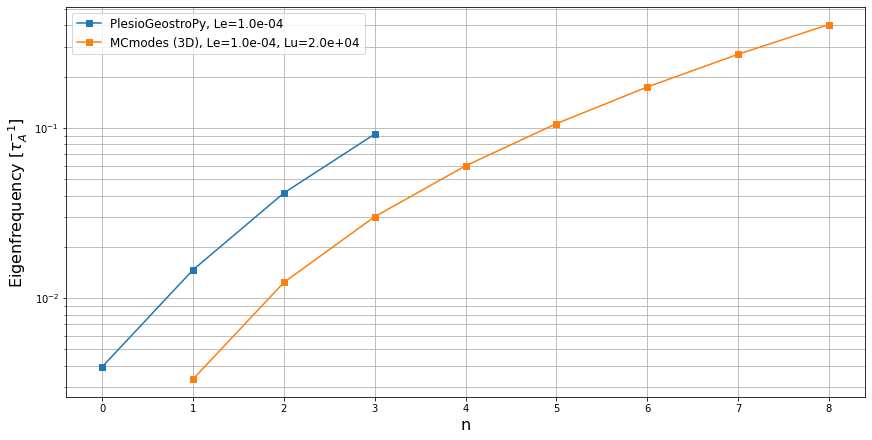

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), layout='constrained')

match_code = 'mc'
match_pg = np.array([idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx for idx in df_pg['Index']])
match_3d = np.array([idx[:len(match_code)] == match_code and idx[len(match_code)] != 'h' and idx[-1] not in ('a', 'b') and '?' not in idx for idx in df_3d['Index']])

match_pg[4] = False

# save_name = './out/eigen/S1_T2_std/Canonical/SpecList_ideal_Le1e-4_m3_i_PGC-3DLu2e+4'
save_name = None

# n_order = np.arange(9)
n_order = np.array([int(idx[len(match_code):]) for idx in df_pg['Index'][match_pg]])
ax.plot(n_order, np.abs(np.imag(df_pg.iloc[match_pg, -1])), 's-', 
        label="PlesioGeostroPy, Le={:.1e}".format(physical_params[params.Le]))

# n_order = np.arange(3, 13)
n_order = np.array([int(idx[len(match_code):]) for idx in df_3d['Index'][match_3d]])
ax.plot(n_order, np.abs(np.imag(df_3d['Value'][match_3d].astype(np.complex128))), 's-', 
        label="MCmodes (3D), Le={:.1e}, Lu={:.1e}".format(params_3d[params.Le], params_3d[params.Lu]))

ax.set_yscale("log")
ax.set_xlabel("n", fontsize=16)
ax.set_ylabel(r"Eigenfrequency [$\tau_A^{-1}$]", fontsize=16)
ax.legend(fontsize=12)
ax.grid(which="both")

if save_name is not None:
    plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight")
    plt.savefig(save_name + ".png", format="png", bbox_inches="tight", dpi=150)

plt.show()

### Eigenvalues

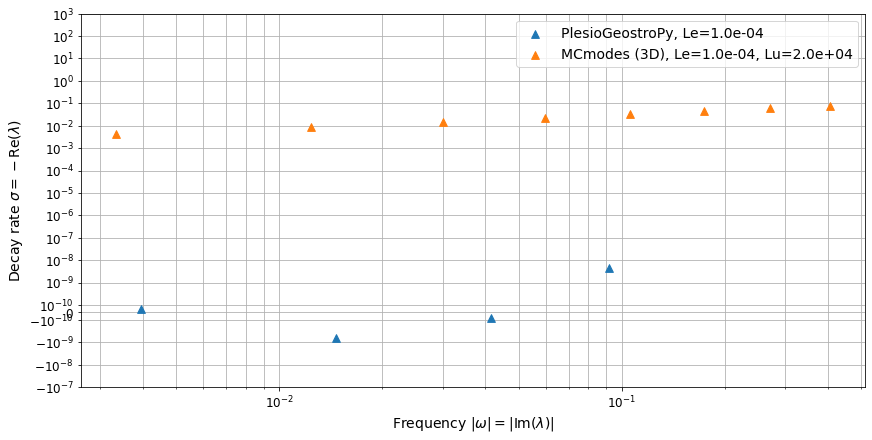

In [16]:
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

# save_name = './out/eigen/S1_std/imgs/SpecDist_ideal_Le1e-4_m1_mc_PGC-3DLu2e+4'
save_name = None

eig_vals_tmp = df_pg.iloc[match_pg, -1]
ax.scatter(np.abs(np.imag(eig_vals_tmp)), -np.real(eig_vals_tmp), s=60, marker='^', 
           label="PlesioGeostroPy, Le={:.1e}".format(physical_params[params.Le]), zorder=5)

eig_vals_tmp = df_3d['Value'][match_3d]
ax.scatter(np.abs(np.imag(eig_vals_tmp)), -np.real(eig_vals_tmp), s=60, marker='^', 
           label="MCmodes (3D), Le={:.1e}, Lu={:.1e}".format(params_3d[params.Le], params_3d[params.Lu]), zorder=5)

ax.set_xlabel(r"Frequency $|\omega| = |\mathrm{Im}(\lambda)|$", fontsize=14)
# ax.set_xlabel(r"Frequency $\omega = \mathrm{Im}(\lambda)$", fontsize=14)
ax.set_ylabel(r"Decay rate $\sigma = -\mathrm{Re}(\lambda)$", fontsize=14)

ax.set_xscale('log')
# ax.set_xscale('symlog', linthresh=1e-3, linscale=.1)
ax.set_yscale('symlog', linthresh=1e-10, linscale=.3)
# ax.set_xlim([4, 6])
ax.set_ylim([-1e-7, 1e+3])
# ax.set_xlim([1e-3, 1e+2])
# ax.set_ylim([-1e-9, 1e-2])
ax.tick_params(axis='both', which='major', labelsize=12)

ax.grid(which="both")
ax.legend(fontsize=14, loc=1)

if save_name is not None:
    if os.path.exists(save_name + '.pdf'):
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.pdf', format="pdf", bbox_inches="tight")
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")
plt.show()

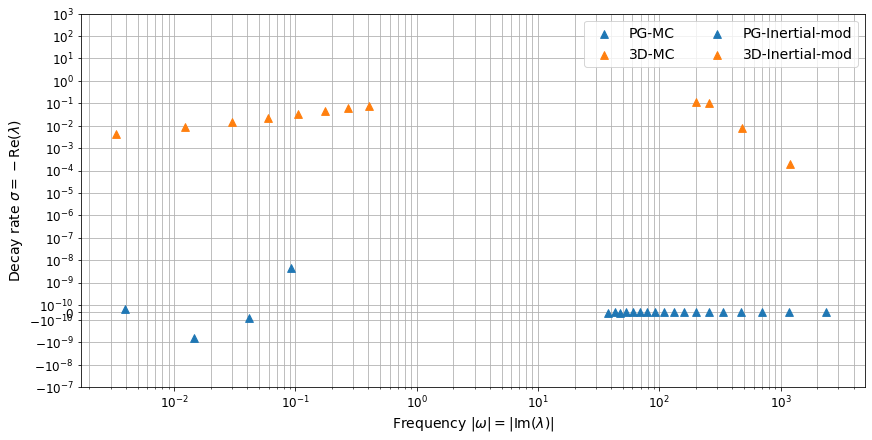

In [20]:
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

# save_name = './out/eigen/S1_std/imgs/SpecDist_ideal_Le1e-4_m1_mc_PGC-3DLu2e+4'
save_name = None

for gp_name in eigv_groups:
        
    match_pg = eigv_groups[gp_name]['PG']
    match_3d = eigv_groups[gp_name]['3D']

    eig_vals_tmp = df_pg.iloc[match_pg, -1]
    ax.scatter(np.abs(np.imag(eig_vals_tmp)), -np.real(eig_vals_tmp), s=60, marker='^', color='tab:blue', label=f"PG-{gp_name}", zorder=5)

    eig_vals_tmp = df_3d['Value'][match_3d]
    ax.scatter(np.abs(np.imag(eig_vals_tmp)), -np.real(eig_vals_tmp), s=60, marker='^', color='tab:orange', label=f"3D-{gp_name}", zorder=5)

ax.set_xlabel(r"Frequency $|\omega| = |\mathrm{Im}(\lambda)|$", fontsize=14)
# ax.set_xlabel(r"Frequency $\omega = \mathrm{Im}(\lambda)$", fontsize=14)
ax.set_ylabel(r"Decay rate $\sigma = -\mathrm{Re}(\lambda)$", fontsize=14)

ax.set_xscale('log')
# ax.set_xscale('symlog', linthresh=1e-3, linscale=.1)
ax.set_yscale('symlog', linthresh=1e-10, linscale=.3)
# ax.set_xlim([4, 6])
ax.set_ylim([-1e-7, 1e+3])
# ax.set_xlim([1e-3, 1e+2])
# ax.set_ylim([-1e-9, 1e-2])
ax.tick_params(axis='both', which='major', labelsize=12)

ax.grid(which="both")
ax.legend(fontsize=14, loc=1, ncols=len(eigv_groups))

if save_name is not None:
    if os.path.exists(save_name + '.pdf'):
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.pdf', format="pdf", bbox_inches="tight")
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")
plt.show()

---
## Configure spectral expansions

In [7]:
from pg_utils.processing import postproc as pproc

### Plesio-geostrophic model

In [8]:
from pg_utils.processing import pg_3d

In [9]:
xpd_identifier

'expand_conjugate_eigen_ext-bound'

In [10]:
from pg_utils.pg_model import expand_conjugate_ext as xpd_cfg

field_func = pproc.eigen_func_from_conjugate(xpd_cfg.recipe, physical_params)

fnames = field_func._field_names
field_nrange = {
    fname: ranges_trial[i_field] if i_field < ranges_trial.size else ranges_trial[0] 
    for i_field, fname in enumerate(fnames)
}
col_nrange = {
    fname: ranges_trial[i_field] if i_field < ranges_trial.size else ranges_trial[0]
    for i_field, fname in enumerate(xpd_cfg.recipe.rad_xpd.bases._field_names)
}

### 3-D model

In [11]:
import models
from operators.polynomials import SphericalHarmonicMode
from operators.worland_transform import WorlandTransform
from operators.associated_legendre_transform import AssociatedLegendreTransformSingleM
from fields import VectorFieldSingleM

nr, maxnl, m_val = 63, 63, 3

# xi_array, _ = specfun.roots_chebyt(120)
# rg = np.sqrt((1 + xi_array)/2)
rg = np.linspace(0, 1, 101)
tg = np.linspace(0, np.pi, 201)
worland_transform = WorlandTransform(nr, maxnl, m_val, r_grid=rg)
legendre_transform = AssociatedLegendreTransformSingleM(maxnl, m_val, tg)

### Background field for 3-D model

Optional, but needs to be computed if one wants to calculate the PG quantities from 3-D solutions.

In [12]:
nr_bg, maxnl_bg, m_bg = 10, 3, 0

# S1
# mode_SH_list = [SphericalHarmonicMode("pol", 1, 0, "1/5 Sqrt[pi/3] r(5 - 3r^2)"),]
# SL2N2
mode_SH_list = [SphericalHarmonicMode("pol", 2, 0, "1/4 Sqrt[3/26] r^2(5r^2 - 7)")]
# S2
# mode_SH_list = [SphericalHarmonicMode("pol", 2, 0, "5/14 Sqrt[3/182] r^2(157 - 296r^2 + 143r^4)")]
# T1S1
# mode_SH_list = [
#     SphericalHarmonicMode("pol", 1, 0, "1/2 Sqrt[(7 pi)/69] r(5 - 3r^2)"),
#     SphericalHarmonicMode("tor", 1, 0, "3/8 Sqrt[70] r(1 - r^2)")
# ]
# T2
# mode_SH_list = [SphericalHarmonicMode("tor", 2, 0, "(16/3) Sqrt[pi/5] r^2(1 - r^2)")]
# T1-SL2N1
# mode_SH_list = [
#     SphericalHarmonicMode("tor", 1, 0, "3 Sqrt[pi] r(1 - r^2)"), 
#     SphericalHarmonicMode("pol", 2, 0, "1/4 Sqrt[3/26] r^2(5r^2 - 7)")
# ]
# S1-T2
# mode_SH_list = [
#     SphericalHarmonicMode("pol", 1, 0, "1/5 Sqrt[pi/3] r(5 - 3r^2)"), 
#     SphericalHarmonicMode("tor", 2, 0, "(16/3) Sqrt[pi/5] r^2(1 - r^2)")
# ]

mode_bg_list = [VectorFieldSingleM.from_SH_mode(nr_bg, maxnl_bg, mode_SH) for mode_SH in mode_SH_list]
mode_bg = mode_bg_list[0]
for mode_tmp in mode_bg_list[1:]:
    mode_bg = mode_bg + mode_tmp
# mode_bg = sum([VectorFieldSingleM.from_SH_mode(nr_bg, maxnl_bg, mode_SH) for mode_SH in mode_SH_list])

---
## Mode visualisation

Meridional visualisation grid.

This set of grid in $(r, \theta)$ coordinates is a natural grid for 3-D results (since they can be made to coincide with the Worland - associated Legendre grids), but is not a natural grid for PG results.

In [ ]:
from scipy import special as specfun

# Meridional grid
R_mesh, T_mesh = np.meshgrid(rg, tg)
S_mesh, Z_mesh = R_mesh*np.sin(T_mesh), R_mesh*np.cos(T_mesh)

# Phi-grid
p_array = np.linspace(0., 2*np.pi, num=201)
S_eq, P_eq = np.meshgrid(rg, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

Select plesio-geostrophic mode

In [27]:
from pg_utils.numerics import matrices as nmatrix

code_pg = 'mc0'
i_pg = np.argmax(df_pg['Index'] == code_pg)
# i_pg = 21

evec_mode_pg = nmatrix.LabeledBlockArray(eig_vecs_pg[:, i_pg], cnames, ranges_trial)
evec_mode_pg = base.LabeledCollection(cnames, 
    **{cname: evec_mode_pg[cname] for cname in cnames})

Select 3-D mode

In [29]:
code_3d = 'mc1'
i_3d = np.argmax(df_3d['Index'] == code_3d)

Ndim_vec = eig_vecs_3d.shape[0] // 2

usp = VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[:Ndim_vec, i_3d])
bsp = VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[Ndim_vec:, i_3d])
norm = np.sqrt(usp.energy)
usp.normalise(norm)
bsp.normalise(norm)

Inspect energy contribution

In [31]:
u_norms_3d = np.array([np.linalg.norm(eig_vecs_3d[:Ndim_vec, i_3d]) for i_3d in range(eig_vecs_3d.shape[1])])
b_norms_3d = np.array([np.linalg.norm(eig_vecs_3d[Ndim_vec:, i_3d]) for i_3d in range(eig_vecs_3d.shape[1])])
norm_ratio_coeff = u_norms_3d/b_norms_3d

In [30]:
u_norms_3d = np.array([np.sqrt(VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[:Ndim_vec, i_3d]).energy) for i_3d in range(eig_vecs_3d.shape[1])])
b_norms_3d = np.array([np.sqrt(VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[Ndim_vec:, i_3d]).energy) for i_3d in range(eig_vecs_3d.shape[1])])
norm_ratio_energy = u_norms_3d/b_norms_3d

In [32]:
norm_ratio_coeff

array([1.16480396e-03, 3.06674344e-03, 6.73777342e-03, 1.30260969e-02,
       2.26868728e-02, 3.62118182e-02, 5.36692554e-02, 7.50444420e-02,
       1.00862193e-01, 6.65305875e+00, 1.07424425e+01, 2.13633142e+01,
       4.30655159e+01, 1.05127279e+02, 3.53269511e+02, 1.62734144e+03])

In [33]:
norm_ratio_energy

array([3.95033713e-04, 1.93487819e-03, 5.34356620e-03, 1.11004370e-02,
       1.97390209e-02, 3.16056199e-02, 4.66663840e-02, 6.45820390e-02,
       8.53016566e-02, 7.24381719e+00, 1.34671257e+01, 2.67928747e+01,
       5.02994735e+01, 1.06795549e+02, 2.80870912e+02, 1.24746455e+03])

### Meridional section

Calculate PG result on meridional plane; since the set of grid is not natural grid for PG, this takes a while

In [185]:
def calc_field_meridional_PG(fname, field_f):
    if fname not in ("U_s", "U_p", "U_z", "Zeta", "Psi"):
        return None
    N_trial = field_nrange[fname]
    S_tmp, Z_tmp = np.stack([S_mesh,]*N_trial, axis=-1), np.stack([Z_mesh,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(S_mesh) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, 0., Z_tmp, N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_mesh[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

eval_mode_pg = field_func.apply(calc_field_meridional_PG, inplace=False, metadata=True)

Calculate 3-D result on the meridional plane.

In [186]:
uphy_md = usp.physical_field(worland_transform, legendre_transform)
bphy_md = bsp.physical_field(worland_transform, legendre_transform)

u_sph = uphy_md.data
u_cyl = {
    's': u_sph['r']*np.sin(T_mesh) + u_sph['theta']*np.cos(T_mesh),
    'phi': u_sph['phi'],
    'z': u_sph['r']*np.cos(T_mesh) - u_sph['theta']*np.sin(T_mesh)
}
b_sph = bphy_md.at_phi(phi=0.)
b_cyl = {
    's': b_sph['r']*np.sin(T_mesh) + b_sph['theta']*np.cos(T_mesh),
    'phi': b_sph['phi'],
    'z': b_sph['r']*np.cos(T_mesh) - b_sph['theta']*np.sin(T_mesh)
}
fields_3d = {
    'U_s': u_cyl['s'], 'U_p': u_cyl['phi'], 'U_z': u_cyl['z'],
    'B_s': b_cyl['s'], 'B_p': b_cyl['phi'], 'B_z': b_cyl['z']
}

Choose phase

In [187]:
anchor_phase_pg = 1/eval_mode_pg['U_s'][np.unravel_index(np.argmax(np.abs(eval_mode_pg['U_s'])), eval_mode_pg['U_s'].shape)]
p_cst_pg = np.angle(anchor_phase_pg)/float(physical_params[xpd.m]) + np.pi/4
p_factor_pg = np.exp(1j*float(physical_params[xpd.m])*p_cst_pg)

In [188]:
anchor_phase_3d = 1/u_cyl['s'][np.unravel_index(np.argmax(np.abs(u_cyl['s'])), u_cyl['s'].shape)]
p_cst_3d = np.angle(anchor_phase_3d)/m_val + np.pi/4
p_factor_3d = np.exp(1j*m_val*p_cst_3d)

C:\Users\gentle\AppData\Local\Temp\ipykernel_5788\3895849850.py:87: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


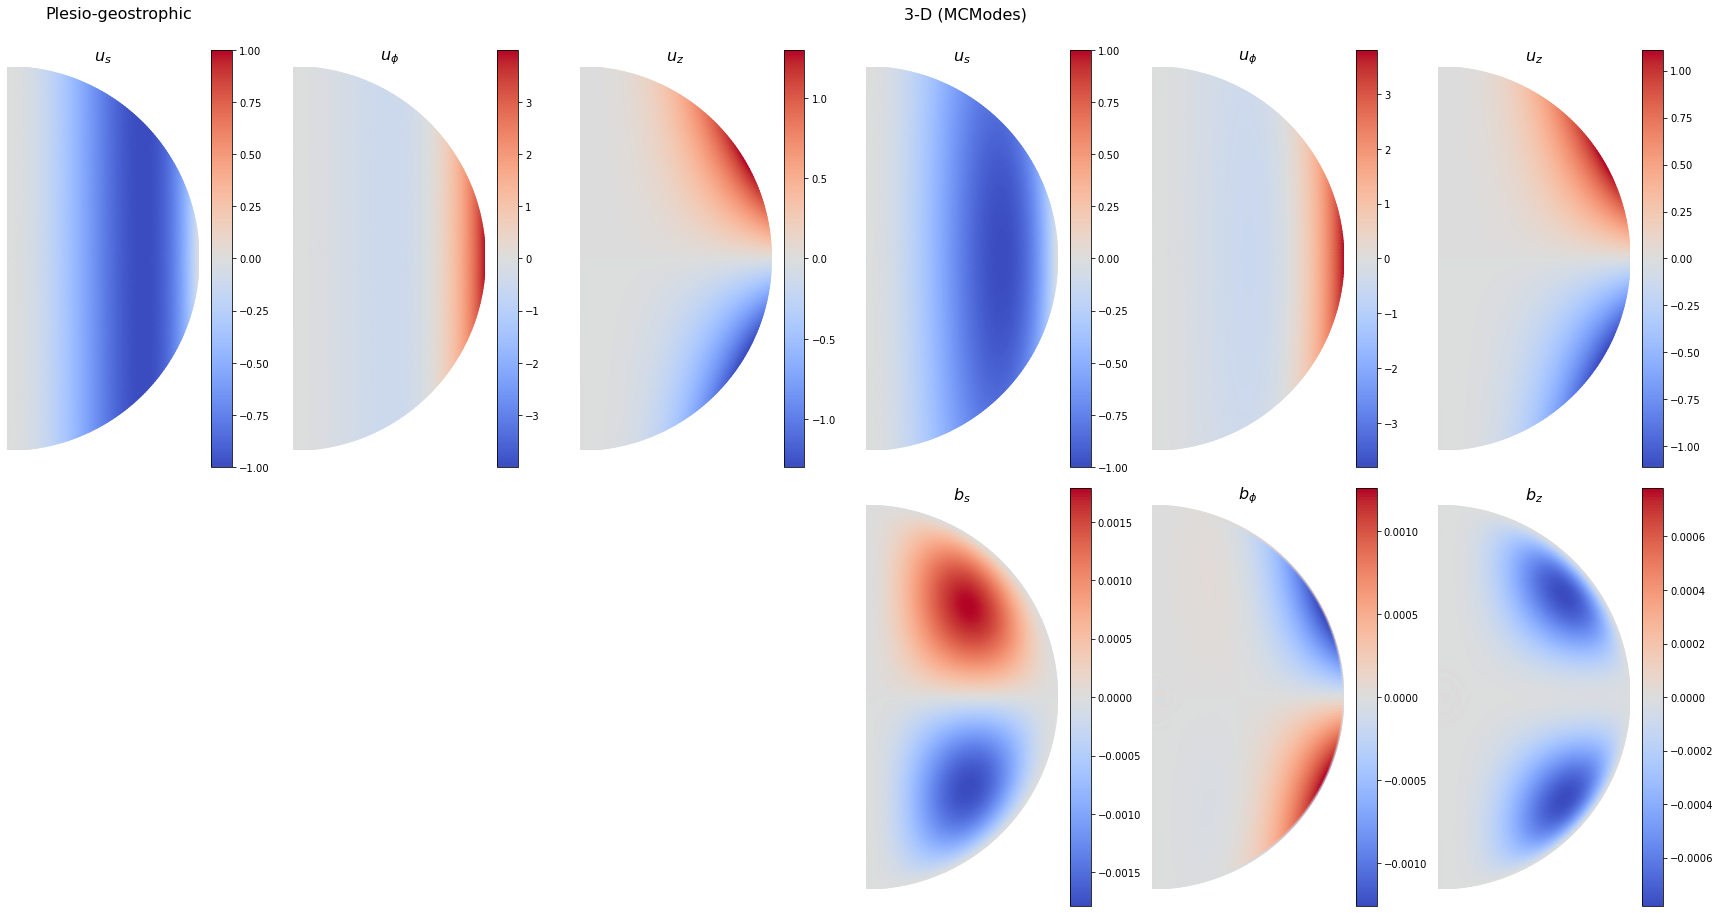

In [189]:
plot_fields = [
    ["U_s", "U_p", "U_z", ],
    ["B_s", "B_p", "B_z", ]
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
    [r"$b_s$", r"$b_\phi$", r"$b_z$", ]
]

save_name = "./out/eigen/S1_T2_std/Canonical/Mode_ideal_merd_Le1e-4_m3-mc7_PGC-3DLu2e+4.png"
save_name = None
override = False

force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(2*ncols*4, 2*nrows*3.2))
axes = np.atleast_2d(axes)

norm_pg = np.max(np.abs(np.real(p_factor_pg*eval_mode_pg['U_s'])))
norm_3d = np.max(np.abs(np.real(p_factor_3d*fields_3d['U_s'])))

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        # PG plot
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eval_mode_pg._field_names) or (eval_mode_pg[fname] is None):
            ax.remove()
        else:
            f_eval = np.real(p_factor_pg*eval_mode_pg[fname]/norm_pg)
            if np.abs(f_eval).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(f_eval))
                    # climit = 0.2
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, 'Plesio-geostrophic', fontsize=16)
        
        ax = axes[i_r][ncols + i_c]
        if (fname is None) or (fname not in fields_3d) or (fields_3d[fname] is None):
            ax.remove()
        else:
            field_plot = np.real(p_factor_3d*fields_3d[fname]/norm_3d)
            if np.abs(field_plot).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(field_plot))
                    # climit = 0.6
                    # if fname == 'U_p':
                    #     climit = np.max(np.abs(field_plot[S_mesh < 0.6]))
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, '3-D (MCModes)', fontsize=16)

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

### Equatorial section

Calculate PG result on equatorial plane.

In [176]:
def calc_field_equatorial_PG(fname, field_f):
    N_trial = field_nrange[fname]
    S_tmp, N_tmp = np.meshgrid(rg, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_tmp, 0., 0., N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_tmp[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    eval_rad = np.sum(eval_tmp, axis=-1)
    eval_azm = np.exp(1j*physical_params[xpd.m]*p_array)
    return np.outer(eval_azm, eval_rad)

def calc_field_eqrad_PG(fname, field_f):
    N_trial = field_nrange[fname]
    S_tmp, N_tmp = np.meshgrid(rg, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_tmp, 0., 0., N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_tmp[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    eval_rad = np.sum(eval_tmp, axis=-1)
    return eval_rad

eqrad_pg = field_func.apply(calc_field_eqrad_PG, inplace=False, metadata=True)

Calculate 3-D result on the equatorial plane. 

In [177]:
uphy_eq = usp.equatorial_slice(worland_transform)
bphy_eq = bsp.equatorial_slice(worland_transform)

u_sph = {k: v[0, :] for k, v in uphy_eq.data.items()}
u_cyl = {'s': u_sph['r'], 'phi': u_sph['phi'], 'z': -u_sph['theta']}
b_sph = {k: v[0, :] for k, v in bphy_eq.data.items()}
b_cyl = {'s': b_sph['r'], 'phi': b_sph['phi'], 'z': -b_sph['theta']}

fields_3d_eq = {
    'U_s': u_cyl['s'], 'U_p': u_cyl['phi'], 'U_z': u_cyl['z'],
    'Bs_e': b_cyl['s'], 'Bp_e': b_cyl['phi'], 'Bz_e': b_cyl['z']
}

Calculating the PG quantities from 3D requires to evaluate the field at a common set of $(s, \phi)$ grid that is not natural grid for the 3-D model, and hence takes a while.

In [178]:
from pg_utils.numerics import utils as nutils

xi_quad, wt_quad = specfun.roots_legendre(65)

z_quad = np.outer(xi_quad, np.sqrt(1 - rg**2))
s_quad = rg*np.ones_like(z_quad)

r_pts, t_pts, p_pts = nutils.coord_cart2sph(s_quad.flatten(), np.array(0.), z_quad.flatten())
beval = bsp.evaluate(r_pts, t_pts, 0.)
beval_bg = mode_bg.evaluate(r_pts, t_pts, 0.)

beval_cyl = {
    's': beval['r']*np.sin(t_pts) + beval['theta']*np.cos(t_pts),
    'phi': beval['phi'],
    'z': beval['r']*np.cos(t_pts) - beval['theta']*np.sin(t_pts)
}
beval_bg_cyl = {
    's': beval_bg['r']*np.sin(t_pts) + beval_bg['theta']*np.cos(t_pts),
    'phi': beval_bg['phi'],
    'z': beval_bg['r']*np.cos(t_pts) - beval_bg['theta']*np.sin(t_pts)
}

b_quad = {k: v.reshape(z_quad.shape) for k, v in beval.items()}
b_bg_quad = {k: v.reshape(z_quad.shape) for k, v in beval_bg.items()}

b_quad_cyl = {k: v.reshape(z_quad.shape) for k, v in beval_cyl.items()}
b_bg_quad_cyl = {k: v.reshape(z_quad.shape) for k, v in beval_bg_cyl.items()}

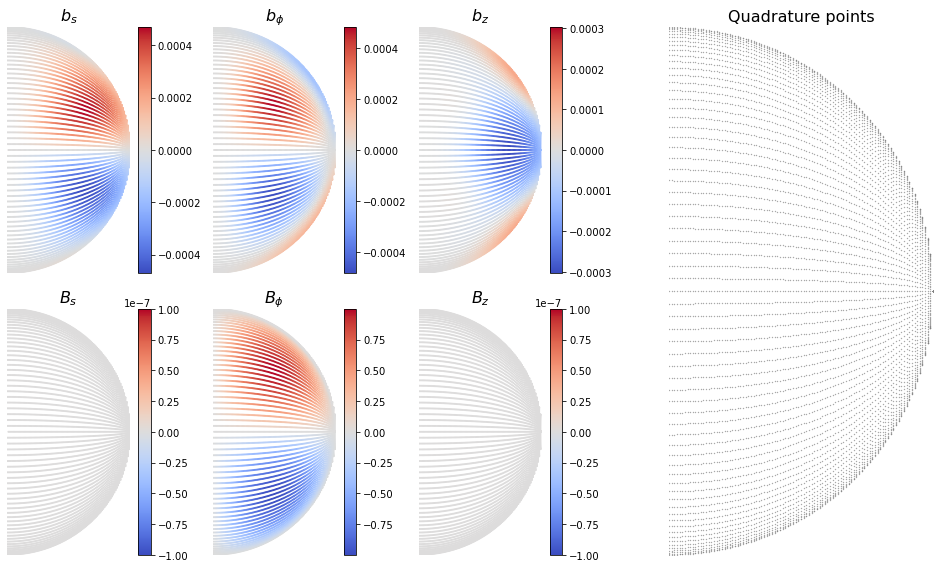

In [65]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 5)

# normalizer = np.abs(ueval['r']).max()
normalizer = np.nanmax(np.abs(beval['r']**2 + beval['theta']**2 + beval['phi']**2))
# normalizer = np.sqrt(np.nanmax(np.real(beval_cyl['s'])**2 + np.real(beval_cyl['z'])**2 + np.real(beval_cyl['phi'])**2))
# normalizer = norm_3d

plot_fields = ['s', 'phi', 'z']
plot_fnames = [
    [r"$b_s$", r"$b_\phi$", r"$b_z$"],
    [r"$B_s$", r"$B_\phi$", r"$B_z$"]
]

f_phase = 1.

for i_c, comp in enumerate(plot_fields):
    ax = fig.add_subplot(gs[0, i_c])
    # climit = 1
    if np.nanmax(np.abs(np.real(f_phase*beval_cyl[comp])))/normalizer >= 1e-7:
        climit = np.nanmax(np.abs(np.real(f_phase*beval_cyl[comp])))/normalizer
    else:
        climit = 1e-7
    im = ax.scatter(s_quad.flatten(), z_quad.flatten(), 1, c=np.real(f_phase*beval_cyl[comp])/normalizer, cmap='coolwarm', vmin=-climit, vmax=+climit)
    plt.colorbar(im, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', 'box')
    ax.set_title(plot_fnames[0][i_c], fontsize=16)
    ax.axis("off")
    
    ax = fig.add_subplot(gs[1, i_c])
    # climit = 1
    if np.nanmax(np.abs(np.real(beval_bg_cyl[comp]))) >= 1e-7:
        climit = np.nanmax(np.abs(np.real(beval_bg_cyl[comp])))
    else:
        climit = 1e-7
    im = ax.scatter(s_quad.flatten(), z_quad.flatten(), 1, c=np.real(beval_bg_cyl[comp]), cmap='coolwarm', vmin=-climit, vmax=+climit)
    # ax.streamplot(s_quad, z_quad, b_bg_quad_cyl['s'], b_bg_quad_cyl['z'], density=.5, minlength=.2)
    plt.colorbar(im, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', 'box')
    ax.set_title(plot_fnames[1][i_c], fontsize=16)
    ax.axis("off")
    
ax = fig.add_subplot(gs[:, 3:])
ax.scatter(s_quad.flatten(), z_quad.flatten(), s=.1, c='gray')
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal', 'box')
ax.set_title("Quadrature points", fontsize=16)
ax.axis("off")

plt.tight_layout()
plt.show()

Integration

In [179]:
eqrad_3d = base.LabeledCollection(['U_s', 'U_p', 'U_z'] + base.CollectionPG.pg_field_names)
for key, val in fields_3d_eq.items():
    eqrad_3d[key] = val

from pg_utils.pg_model import pg_3d
m_3d = pg_3d.moments_3d_linearised(b_bg_quad_cyl, b_quad_cyl, z_quad)
wt_3d = np.outer(wt_quad, np.sqrt(1 - rg**2))
eqrad_3d = pg_3d.moments_int_pg(m_3d, z_quad, wt_3d, axis=0, out_field=eqrad_3d)

Choose phase

In [180]:
anchor_phase_pg = 1/eqrad_pg['U_s'][np.argmax(np.abs(eqrad_pg['U_s']))]
p_cst_pg = np.angle(anchor_phase_pg)/physical_params[xpd.m]
p_factor_pg = np.exp(1j*float(physical_params[xpd.m])*(p_array + p_cst_pg))

In [181]:
anchor_phase_3d = 1/u_cyl['s'][np.argmax(np.abs(u_cyl['s']))]
p_cst_3d = np.angle(anchor_phase_3d)/m_val
p_factor_3d = np.exp(1j*m_val*(p_array + p_cst_3d))

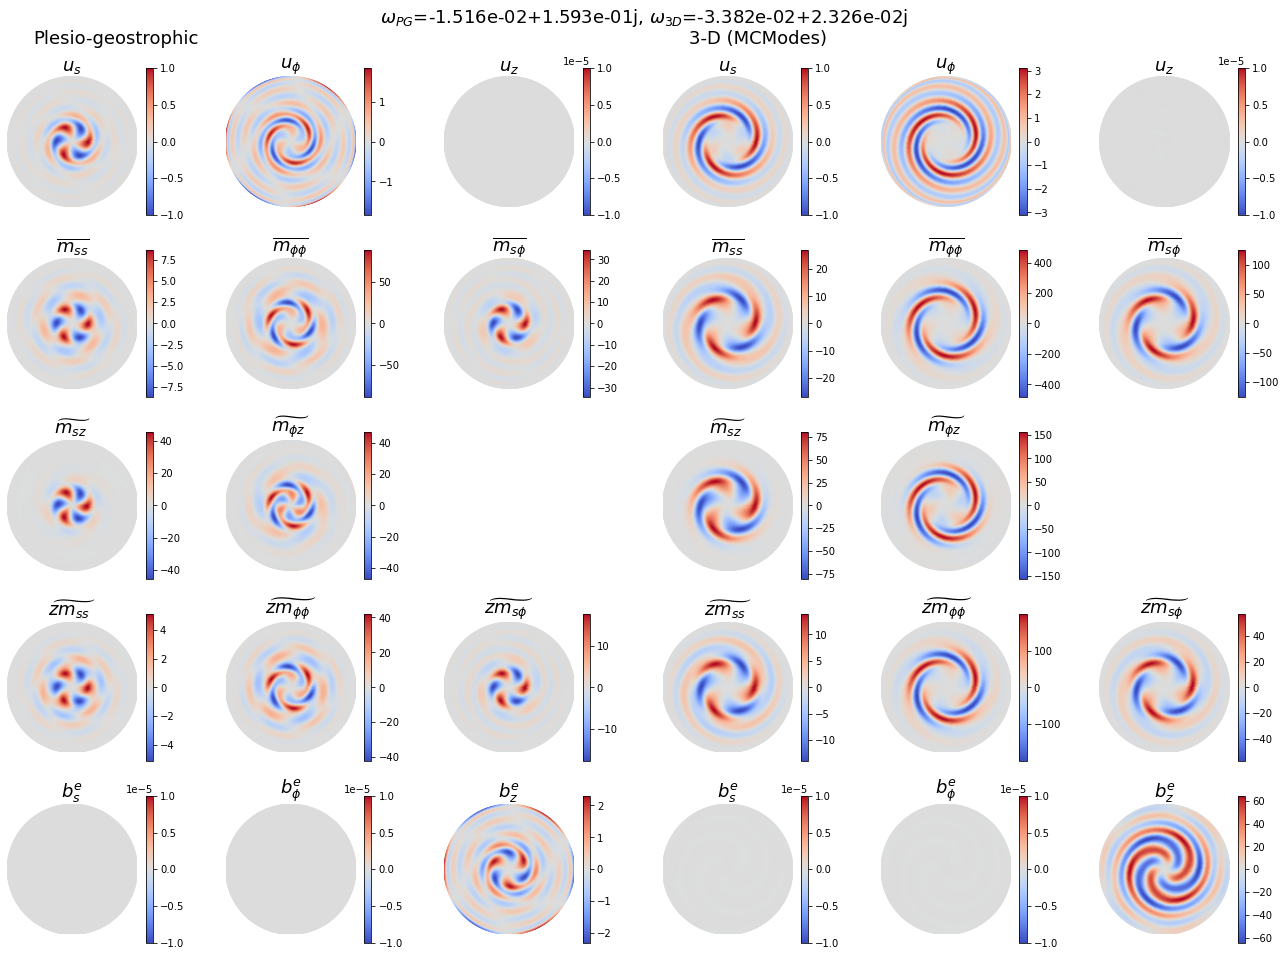

In [182]:
plot_fields = [
    ["U_s", "U_p", "U_z"],
    ["Mss", "Mpp", "Msp"], 
    ["Msz", "Mpz", None],
    ["zMss", "zMpp", "zMsp"],
    ["Bs_e", "Bp_e", "Bz_e"]
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
    [r'$\overline{m_{ss}}$', r'$\overline{m_{\phi\phi}}$', r'$\overline{m_{s\phi}}$'], 
    [r'$\widetilde{m_{sz}}$', r'$\widetilde{m_{\phi z}}$', None], 
    [r'$\widetilde{zm_{ss}}$', r'$\widetilde{zm_{\phi\phi}}$', r'$\widetilde{zm_{s\phi}}$'],
    [r'$b_s^e$', r'$b_\phi^e$', r'$b_z^e$']
]
# plot_fields = [['U_s', 'U_p', 'U_z'],]
# plot_fnames = [[r"$u_s$", r"$u_\phi$", "$u_z$"],]

rotate_us_max = True
S_eq, P_eq = np.meshgrid(rg, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
# save_name = None
override = False

norm_pg = np.abs(eqrad_pg['U_s']).max()
norm_3d = np.abs(fields_3d_eq['U_s']).max()

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(2*ncols*3, nrows*2.7))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eqrad_pg._field_names) or (eqrad_pg[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_pg, eqrad_pg[fname])/norm_pg)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(-0.6, 1.5, 'Plesio-geostrophic', fontsize=18)
                
        ax = axes[i_r][ncols+i_c]
        if (fname is None) or (fname not in eqrad_3d._field_names) or (eqrad_3d[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_3d, eqrad_3d[fname])/norm_3d)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(-0.6, 1.5, '3-D (MCModes)', fontsize=18)

fig.suptitle('$\\omega_{{PG}}$={:.3e}, $\\omega_{{3D}}$={:.3e}'.format(eig_vals_pg[i_pg], eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

----
## Project 3D solutions to PG fields

In [13]:
from pg_utils.processing import pg_3d
from pg_utils.numerics import symparser
from pg_utils.numerics import basis as base_f
from scipy import special as specfun
from IPython.display import Markdown, Latex

Select mode

In [14]:
code_3d = 'mc1'
i_3d = np.argmax(df_3d['Index'] == code_3d)

Ndim_vec = eig_vecs_3d.shape[0] // 2

usp = VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[:Ndim_vec, i_3d])
bsp = VectorFieldSingleM(nr, maxnl, m_val, eig_vecs_3d[Ndim_vec:, i_3d])
norm = np.sqrt(usp.energy)
usp.normalise(norm)
bsp.normalise(norm)

In [15]:
code_3d = 'mc1'
i_3d = np.argmax(df_3d['Index'] == code_3d)
spec_ctx = pg_3d.ResolutionContext3D_cstM(N=63, L=63, m_val=3)

usp, bsp = pg_3d.eigmode_3d_from_eigvec(eig_vecs_3d[:, i_3d], spec_ctx, normalize='none')

### Magnetic quantities

#### Generate quadrature points based on the PG spectral expansion recipe

In [14]:
basis_pg_sym = pg_3d.recipe_basis_2_polar_jacobi(xpd_cfg.recipe)
basis_pg_fun = base.LabeledCollection(
    basis_pg_sym._field_names, 
    **{
        key: symparser.basis_evaluator(basis_pg_sym[key].subs({xpd.m: m_val}), 125, qmode='lowest', dealias=1.1, prec=None) 
        for key in basis_pg_sym._field_names
    }
)

for key in basis_pg_sym._field_names:
    display(
        Markdown('{}: $\\quad {} \\quad \\mapsto \\quad {} \\quad \\mapsto \\quad$ Gauss-Jacobi quadrature N={}, a={}, b={}'.format(
            key, sym.latex(xpd_cfg.recipe.base_expr[xpd_cfg.recipe.rad_xpd.bases[key]]), sym.latex(basis_pg_sym[key]),
            basis_pg_fun[key].N_quad, basis_pg_fun[key].a_quad, basis_pg_fun[key].b_quad),
        )
    )

Psi: $\quad s^{\left|{m}\right|} H^{3}{\left(s \right)} P_{\ell}^{\left(\frac{3}{2},\left|{m}\right|\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(3,\left|{m}\right|,\frac{3}{2},\left|{m}\right|)}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=-0.5, b=0

M_1: $\quad s^{\left|{m}\right|} H{\left(s \right)} P_{\ell}^{\left(1,\left|{m}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(1,\left|{m}\right|,1,\left|{m}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

M_p: $\quad s^{\left|{m + 2}\right|} H{\left(s \right)} P_{\ell}^{\left(1,\left|{m + 2}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(1,\left|{m + 2}\right|,1,\left|{m + 2}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

M_m: $\quad s^{\left|{m - 2}\right|} H{\left(s \right)} P_{\ell}^{\left(1,\left|{m - 2}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(1,\left|{m - 2}\right|,1,\left|{m - 2}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

M_zp: $\quad s^{\left|{m + 1}\right|} H^{2}{\left(s \right)} P_{\ell}^{\left(2,\left|{m + 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(2,\left|{m + 1}\right|,2,\left|{m + 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

M_zm: $\quad s^{\left|{m - 1}\right|} H^{2}{\left(s \right)} P_{\ell}^{\left(2,\left|{m - 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(2,\left|{m - 1}\right|,2,\left|{m - 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

zM_1: $\quad s^{\left|{m}\right|} H^{2}{\left(s \right)} P_{\ell}^{\left(2,\left|{m}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(2,\left|{m}\right|,2,\left|{m}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

zM_p: $\quad s^{\left|{m + 2}\right|} H^{2}{\left(s \right)} P_{\ell}^{\left(2,\left|{m + 2}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(2,\left|{m + 2}\right|,2,\left|{m + 2}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

zM_m: $\quad s^{\left|{m - 2}\right|} H^{2}{\left(s \right)} P_{\ell}^{\left(2,\left|{m - 2}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(2,\left|{m - 2}\right|,2,\left|{m - 2}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

B_ep: $\quad s^{\left|{m + 1}\right|} P_{\ell}^{\left(0,\left|{m + 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m + 1}\right|,0,\left|{m + 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

B_em: $\quad s^{\left|{m - 1}\right|} P_{\ell}^{\left(0,\left|{m - 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m - 1}\right|,0,\left|{m - 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

Bz_e: $\quad s^{\left|{m}\right|} P_{\ell}^{\left(0,\left|{m}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m}\right|,0,\left|{m}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

dB_dz_ep: $\quad s^{\left|{m + 1}\right|} P_{\ell}^{\left(0,\left|{m + 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m + 1}\right|,0,\left|{m + 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

dB_dz_em: $\quad s^{\left|{m - 1}\right|} P_{\ell}^{\left(0,\left|{m - 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m - 1}\right|,0,\left|{m - 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

B_pp: $\quad s^{\left|{m + 1}\right|} P_{\ell}^{\left(0,\left|{m + 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m + 1}\right|,0,\left|{m + 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

B_pm: $\quad s^{\left|{m - 1}\right|} P_{\ell}^{\left(0,\left|{m - 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m - 1}\right|,0,\left|{m - 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

Bz_p: $\quad s^{\left|{m}\right|} P_{\ell}^{\left(0,\left|{m}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m}\right|,0,\left|{m}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

B_mp: $\quad s^{\left|{m + 1}\right|} P_{\ell}^{\left(0,\left|{m + 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m + 1}\right|,0,\left|{m + 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

B_mm: $\quad s^{\left|{m - 1}\right|} P_{\ell}^{\left(0,\left|{m - 1}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m - 1}\right|,0,\left|{m - 1}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

Bz_m: $\quad s^{\left|{m}\right|} P_{\ell}^{\left(0,\left|{m}\right| - \frac{1}{2}\right)}\left(2 s^{2} - 1\right) \quad \mapsto \quad Q_{\ell}^{(0,\left|{m}\right|,0,\left|{m}\right| - \frac{1}{2})}(s) \quad \mapsto \quad$ Gauss-Jacobi quadrature N=138, a=0, b=-0.5

In [17]:
basis_pg_fun = pg_3d.generate_spec_transforms(xpd_cfg.recipe, spec_ctx, 125)

In [18]:
required_grids = dict()
grid_ptrs = dict()
for fname in basis_pg_fun._field_names:
    a_tmp, b_tmp = basis_pg_fun[fname].a_quad, basis_pg_fun[fname].b_quad
    if (a_tmp, b_tmp) not in required_grids:
        required_grids[(a_tmp, b_tmp)] = basis_pg_fun[fname].grid
        grid_ptrs[(a_tmp, b_tmp)] = list()
    grid_ptrs[(a_tmp, b_tmp)].append(fname)

for key in required_grids:
    print("Gauss-Jacobi grid a={}, b={}; Required by {}".format(key[0], key[1], grid_ptrs[key]))

Gauss-Jacobi grid a=-0.5, b=0; Required by ['Psi']
Gauss-Jacobi grid a=0, b=-0.5; Required by ['M_1', 'M_p', 'M_m', 'M_zp', 'M_zm', 'zM_1', 'zM_p', 'zM_m', 'B_ep', 'B_em', 'Bz_e', 'dB_dz_ep', 'dB_dz_em', 'B_pp', 'B_pm', 'Bz_p', 'B_mp', 'B_mm', 'Bz_m']


#### Evaluate magnetic fields on the required grid

In [27]:
from pg_utils.numerics import utils as nutils

z_grid, wt_z = specfun.roots_legendre(65)
z_grid = np.r_[-1, z_grid, 1]
wt_z = np.r_[0, wt_z, 0]
s_grid = np.sqrt((1 + required_grids[(0, -0.5)])/2)
H_grid = np.sqrt((1 - required_grids[(0, -0.5)])/2)

z_quad = np.outer(z_grid, H_grid)
wt_quad = np.outer(wt_z, H_grid)
s_quad = np.ones_like(z_quad)*s_grid

r_pts, t_pts, p_pts = nutils.coord_cart2sph(s_quad.flatten(), np.array(0.), z_quad.flatten())
beval = bsp.evaluate(r_pts, t_pts, 0.)
beval_bg = mode_bg.evaluate(r_pts, t_pts, 0.)

beval_cyl = {
    's': beval['r']*np.sin(t_pts) + beval['theta']*np.cos(t_pts),
    'phi': beval['phi'],
    'z': beval['r']*np.cos(t_pts) - beval['theta']*np.sin(t_pts)
}
beval_bg_cyl = {
    's': beval_bg['r']*np.sin(t_pts) + beval_bg['theta']*np.cos(t_pts),
    'phi': beval_bg['phi'],
    'z': beval_bg['r']*np.cos(t_pts) - beval_bg['theta']*np.sin(t_pts)
}

b_quad_cyl = {k: v.reshape(z_quad.shape) for k, v in beval_cyl.items()}
b_bg_quad_cyl = {k: v.reshape(z_quad.shape) for k, v in beval_bg_cyl.items()}

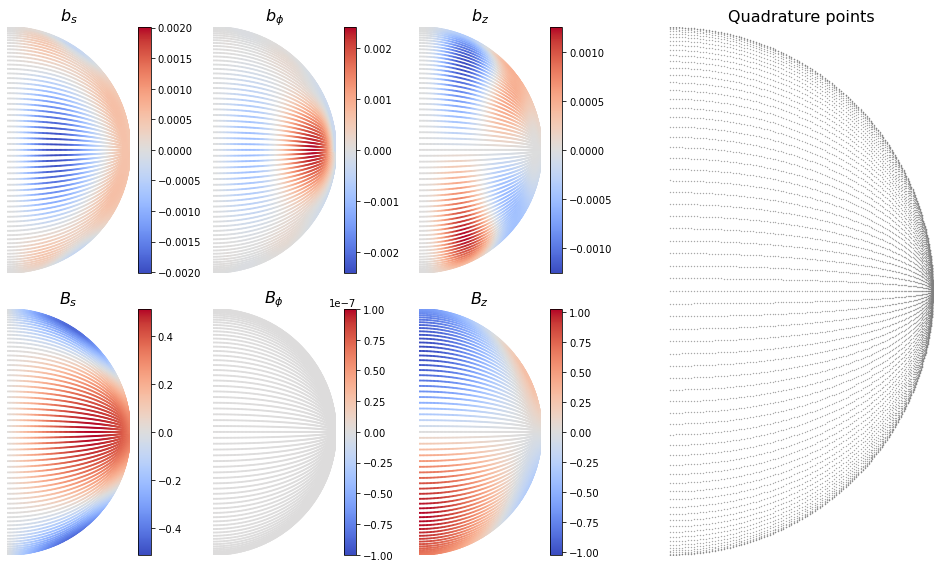

In [96]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(2, 5)

# normalizer = np.abs(ueval['r']).max()
normalizer = np.nanmax(np.abs(beval['r']**2 + beval['theta']**2 + beval['phi']**2))
# normalizer = np.sqrt(np.nanmax(np.real(beval_cyl['s'])**2 + np.real(beval_cyl['z'])**2 + np.real(beval_cyl['phi'])**2))
# normalizer = norm_3d

plot_fields = ['s', 'phi', 'z']
plot_fnames = [
    [r"$b_s$", r"$b_\phi$", r"$b_z$"],
    [r"$B_s$", r"$B_\phi$", r"$B_z$"]
]

f_phase = 1.

for i_c, comp in enumerate(plot_fields):
    ax = fig.add_subplot(gs[0, i_c])
    # climit = 1
    if np.nanmax(np.abs(np.real(f_phase*beval_cyl[comp])))/normalizer >= 1e-7:
        climit = np.nanmax(np.abs(np.real(f_phase*beval_cyl[comp])))/normalizer
    else:
        climit = 1e-7
    im = ax.scatter(s_quad.flatten(), z_quad.flatten(), 1, c=np.real(f_phase*beval_cyl[comp])/normalizer, cmap='coolwarm', vmin=-climit, vmax=+climit)
    plt.colorbar(im, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', 'box')
    ax.set_title(plot_fnames[0][i_c], fontsize=16)
    ax.axis("off")
    
    ax = fig.add_subplot(gs[1, i_c])
    # climit = 1
    if np.nanmax(np.abs(np.real(beval_bg_cyl[comp]))) >= 1e-7:
        climit = np.nanmax(np.abs(np.real(beval_bg_cyl[comp])))
    else:
        climit = 1e-7
    im = ax.scatter(s_quad.flatten(), z_quad.flatten(), 1, c=np.real(beval_bg_cyl[comp]), cmap='coolwarm', vmin=-climit, vmax=+climit)
    # ax.streamplot(s_quad, z_quad, b_bg_quad_cyl['s'], b_bg_quad_cyl['z'], density=.5, minlength=.2)
    plt.colorbar(im, ax=ax)
    ax.set_xlim([0, 1])
    ax.set_ylim([-1, 1])
    ax.set_aspect('equal', 'box')
    ax.set_title(plot_fnames[1][i_c], fontsize=16)
    ax.axis("off")
    
ax = fig.add_subplot(gs[:, 3:])
ax.scatter(s_quad.flatten(), z_quad.flatten(), s=.1, c='gray')
ax.set_xlim([0, 1])
ax.set_ylim([-1, 1])
ax.set_aspect('equal', 'box')
ax.set_title("Quadrature points", fontsize=16)
ax.axis("off")

plt.tight_layout()
plt.show()

#### Vertical integration

In [ ]:
eqrad_3d = base.CollectionPG()

m_3d = pg_3d.moments_3d_linearised(b_bg_quad_cyl, b_quad_cyl, z_quad)
wt_3d = np.outer(wt_z, H_grid)
eqrad_3d = pg_3d.moments_int_pg(m_3d, z_quad, wt_3d, axis=0, out_field=eqrad_3d)

In [19]:
s_grid = np.sqrt((1 + required_grids[(0, -0.5)])/2)

eqrad_3d = base.CollectionPG()
eqrad_3d = pg_3d.pg_phys_moments_lin_zint(mode_bg, bsp, s_grid, 65, out_field=eqrad_3d)

Equatorial and boundary quantities

In [120]:
i_eq = z_grid.size // 2

eqrad_3d.Bs_e = b_quad_cyl['s'][i_eq, :]
eqrad_3d.Bp_e = b_quad_cyl['phi'][i_eq, :]
eqrad_3d.Bz_e = b_quad_cyl['z'][i_eq, :]
eqrad_3d.dBs_dz_e = (b_quad_cyl['s'][i_eq+1, :] - b_quad_cyl['s'][i_eq-1, :])/(z_quad[i_eq+1, :] - z_quad[i_eq-1, :])
eqrad_3d.dBp_dz_e = (b_quad_cyl['phi'][i_eq+1, :] - b_quad_cyl['phi'][i_eq-1, :])/(z_quad[i_eq+1, :] - z_quad[i_eq-1, :])

eqrad_3d.Bs_p = b_quad_cyl['s'][-1, :]
eqrad_3d.Bp_p = b_quad_cyl['phi'][-1, :]
eqrad_3d.Bz_p = b_quad_cyl['z'][-1, :]

eqrad_3d.Bs_m = b_quad_cyl['s'][0, :]
eqrad_3d.Bp_m = b_quad_cyl['phi'][0, :]
eqrad_3d.Bz_m = b_quad_cyl['z'][0, :]

In [23]:
eqrad_3d = pg_3d.pg_phys_b_equatorial(bsp, s_grid, out_field=eqrad_3d)
eqrad_3d = pg_3d.pg_phys_b_ul(bsp, s_grid, out_field=eqrad_3d)

Visualisation

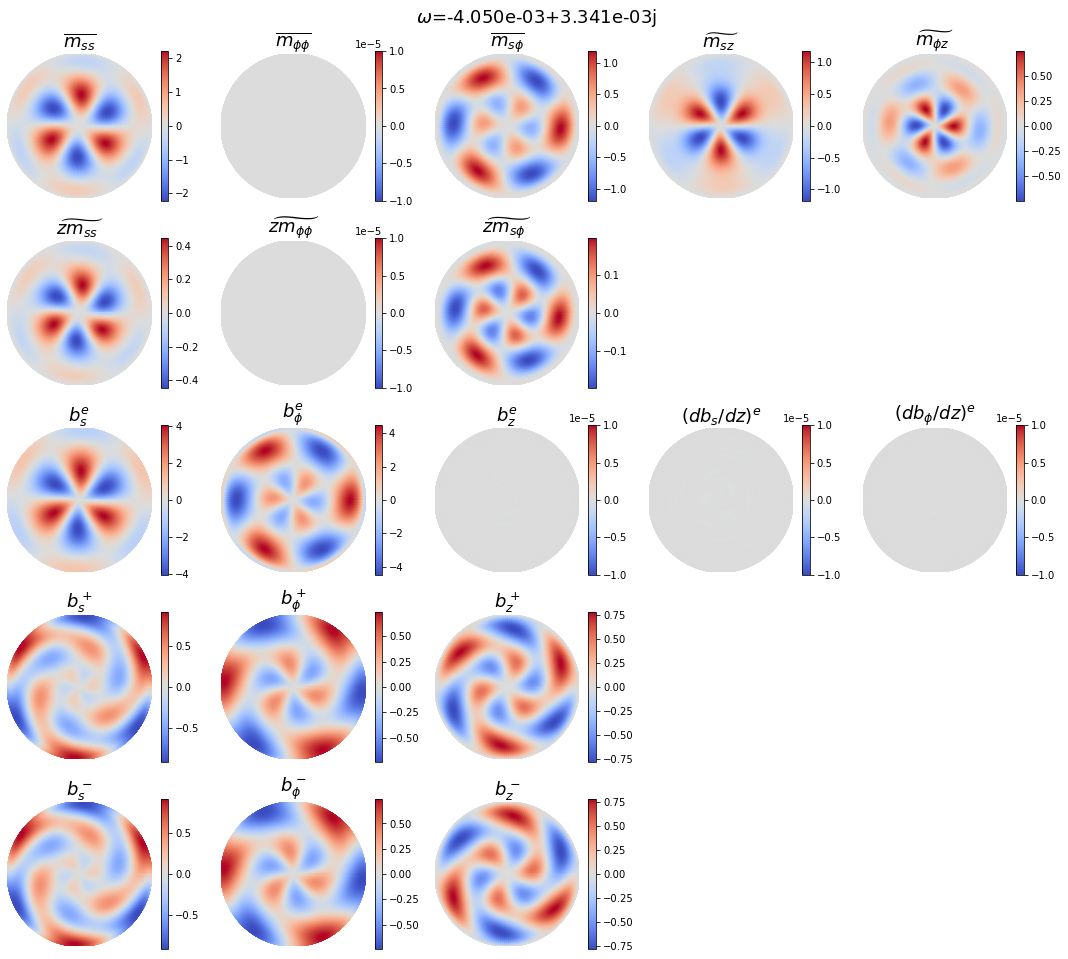

In [24]:
plot_fields = [
    ["Mss", "Mpp", "Msp", "Msz", "Mpz"], 
    ["zMss", "zMpp", "zMsp", None, None],
    ["Bs_e", "Bp_e", "Bz_e", "dBs_dz_e", "dBp_dz_e"],
    ["Bs_p", "Bp_p", "Bz_p", None, None],
    ["Bs_m", "Bp_m", "Bz_m", None, None]
]
plot_fnames = [
    [r'$\overline{m_{ss}}$', r'$\overline{m_{\phi\phi}}$', r'$\overline{m_{s\phi}}$', r'$\widetilde{m_{sz}}$', r'$\widetilde{m_{\phi z}}$'], 
    [r'$\widetilde{zm_{ss}}$', r'$\widetilde{zm_{\phi\phi}}$', r'$\widetilde{zm_{s\phi}}$', None, None],
    [r'$b_s^e$', r'$b_\phi^e$', r'$b_z^e$', r'$(db_s/dz)^e$', r'$(db_\phi/dz)^e$'],
    [r'$b_s^+$', r'$b_\phi^+$', r'$b_z^+$', None, None],
    [r'$b_s^-$', r'$b_\phi^-$', r'$b_z^-$', None, None]
]

p_array = np.linspace(0, 2*np.pi, num=201)
anchor_phase_3d = 1/eqrad_3d['Bp_e'].flatten()[np.argmax(np.abs(eqrad_3d['Bp_e']))]
p_cst_3d = np.angle(anchor_phase_3d)/m_val
p_factor_3d = np.exp(1j*m_val*(p_array + p_cst_3d))

S_eq, P_eq = np.meshgrid(s_grid, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

# save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
save_name = None
override = False

norm_3d = 1

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2.7))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        
        fname = plot_fields[i_r][i_c]        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eqrad_3d._field_names) or (eqrad_3d[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_3d, eqrad_3d[fname])/norm_3d)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")

fig.suptitle('$\\omega$={:.3e}'.format(eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

#### Convert to canonical form

In [37]:
eqcan_3d = pproc.arr_pg_2_conj(eqrad_3d)

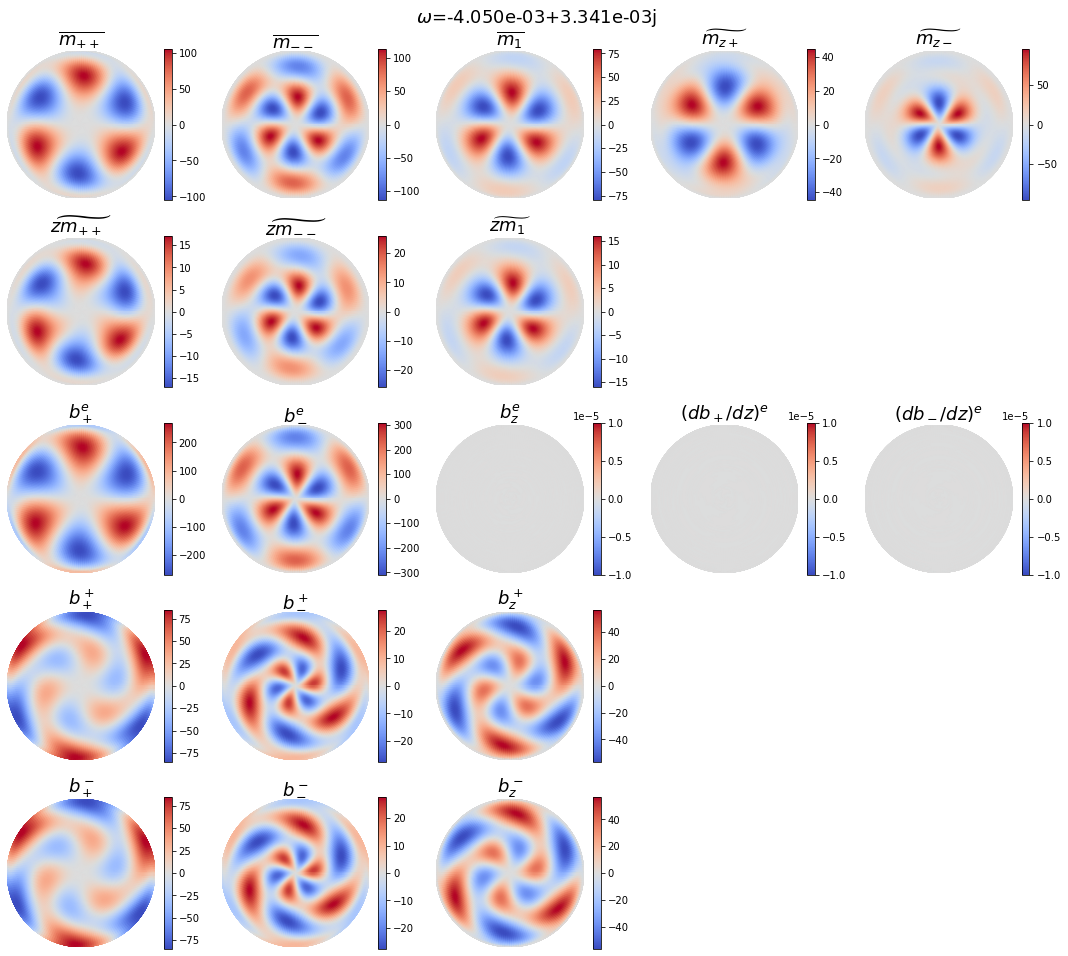

In [131]:
plot_fields = [
    ["M_p", "M_m", "M_1", "M_zp", "M_zm"], 
    ["zM_p", "zM_m", "zM_1", None, None],
    ["B_ep", "B_em", "Bz_e", "dB_dz_ep", "dB_dz_em"],
    ["B_pp", "B_pm", "Bz_p", None, None],
    ["B_mp", "B_mm", "Bz_m", None, None]
]
plot_fnames = [
    [r'$\overline{m_{++}}$', r'$\overline{m_{--}}$', r'$\overline{m_{1}}$', r'$\widetilde{m_{z+}}$', r'$\widetilde{m_{z-}}$'], 
    [r'$\widetilde{zm_{++}}$', r'$\widetilde{zm_{--}}$', r'$\widetilde{zm_{1}}$', None, None],
    [r'$b_+^e$', r'$b_-^e$', r'$b_z^e$', r'$(db_+/dz)^e$', r'$(db_-/dz)^e$'],
    [r'$b_+^+$', r'$b_-^+$', r'$b_z^+$', None, None],
    [r'$b_+^-$', r'$b_-^-$', r'$b_z^-$', None, None]
]

p_array = np.linspace(0, 2*np.pi, num=201)
anchor_phase_3d = 1/b_quad_cyl['phi'].flatten()[np.argmax(np.abs(b_quad_cyl['phi']))]
p_cst_3d = np.angle(anchor_phase_3d)/m_val
p_factor_3d = np.exp(1j*m_val*(p_array + p_cst_3d))

S_eq, P_eq = np.meshgrid(s_grid, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

# save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
save_name = None
override = False

norm_3d = 1

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2.7))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        
        fname = plot_fields[i_r][i_c]        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eqcan_3d._field_names) or (eqcan_3d[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_3d, eqcan_3d[fname])/norm_3d)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")

fig.suptitle('$\\omega$={:.3e}'.format(eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

#### Project onto PG spectral basis

In [32]:
col_nrange

{'Psi': 121,
 'M_1': 125,
 'M_p': 125,
 'M_m': 125,
 'M_zp': 125,
 'M_zm': 125,
 'zM_1': 125,
 'zM_p': 125,
 'zM_m': 125,
 'B_ep': 121,
 'B_em': 121,
 'Bz_e': 121,
 'dB_dz_ep': 121,
 'dB_dz_em': 121,
 'B_pp': 121,
 'B_pm': 121,
 'Bz_p': 121,
 'B_mp': 121,
 'B_mm': 121,
 'Bz_m': 121}

In [150]:
evec_proj_dict = {
    key: (basis_pg_fun[key].integrate(eqcan_3d[key]) if eqcan_3d[key] is not None else None)
    for key in eqcan_3d._field_names
}
evec_proj = np.concatenate([
    evec_proj_dict[key][:col_nrange[key]] if evec_proj_dict[key] is not None else np.zeros(col_nrange[key])
    for key in eqcan_3d._field_names if key != 'Br_b'
])

Visualize spectra

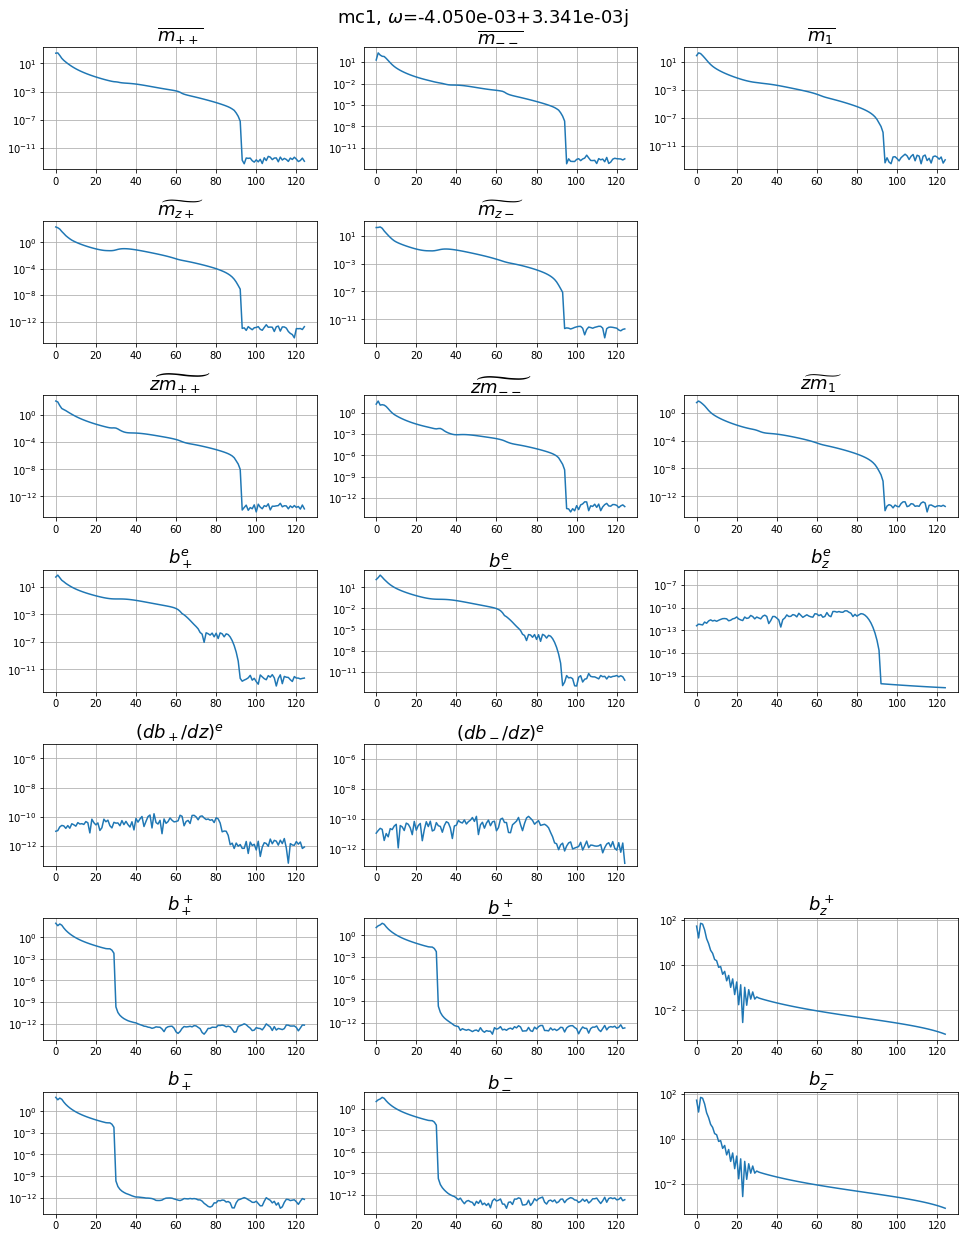

In [163]:
plot_fields = [
    ["M_p", "M_m", "M_1"], 
    ["M_zp", "M_zm", None],
    ["zM_p", "zM_m", "zM_1"],
    ["B_ep", "B_em", "Bz_e"],
    ["dB_dz_ep", "dB_dz_em", None],
    ["B_pp", "B_pm", "Bz_p"],
    ["B_mp", "B_mm", "Bz_m"]
]
plot_fnames = [
    [r'$\overline{m_{++}}$', r'$\overline{m_{--}}$', r'$\overline{m_{1}}$'],
    [r'$\widetilde{m_{z+}}$', r'$\widetilde{m_{z-}}$', None], 
    [r'$\widetilde{zm_{++}}$', r'$\widetilde{zm_{--}}$', r'$\widetilde{zm_{1}}$'],
    [r'$b_+^e$', r'$b_-^e$', r'$b_z^e$'],
    [r'$(db_+/dz)^e$', r'$(db_-/dz)^e$', None],
    [r'$b_+^+$', r'$b_-^+$', r'$b_z^+$'],
    [r'$b_+^-$', r'$b_-^-$', r'$b_z^-$']
]

# save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
save_name = None
override = False

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4.5, nrows*2.5))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        
        fname = plot_fields[i_r][i_c]        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in evec_proj_dict) or (evec_proj_dict[fname] is None):
            ax.remove()
        else:
            f_plot = np.abs(evec_proj_dict[fname])
            ax.plot(f_plot)
            
            ax.set_yscale('log')
            if np.max(f_plot) < 1e-5:
                ax.set_ylim([None, 1e-5])
            ax.grid(which='both')
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)

fig.suptitle('{}, $\\omega$={:.3e}'.format(df_3d.Index[i_3d], eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

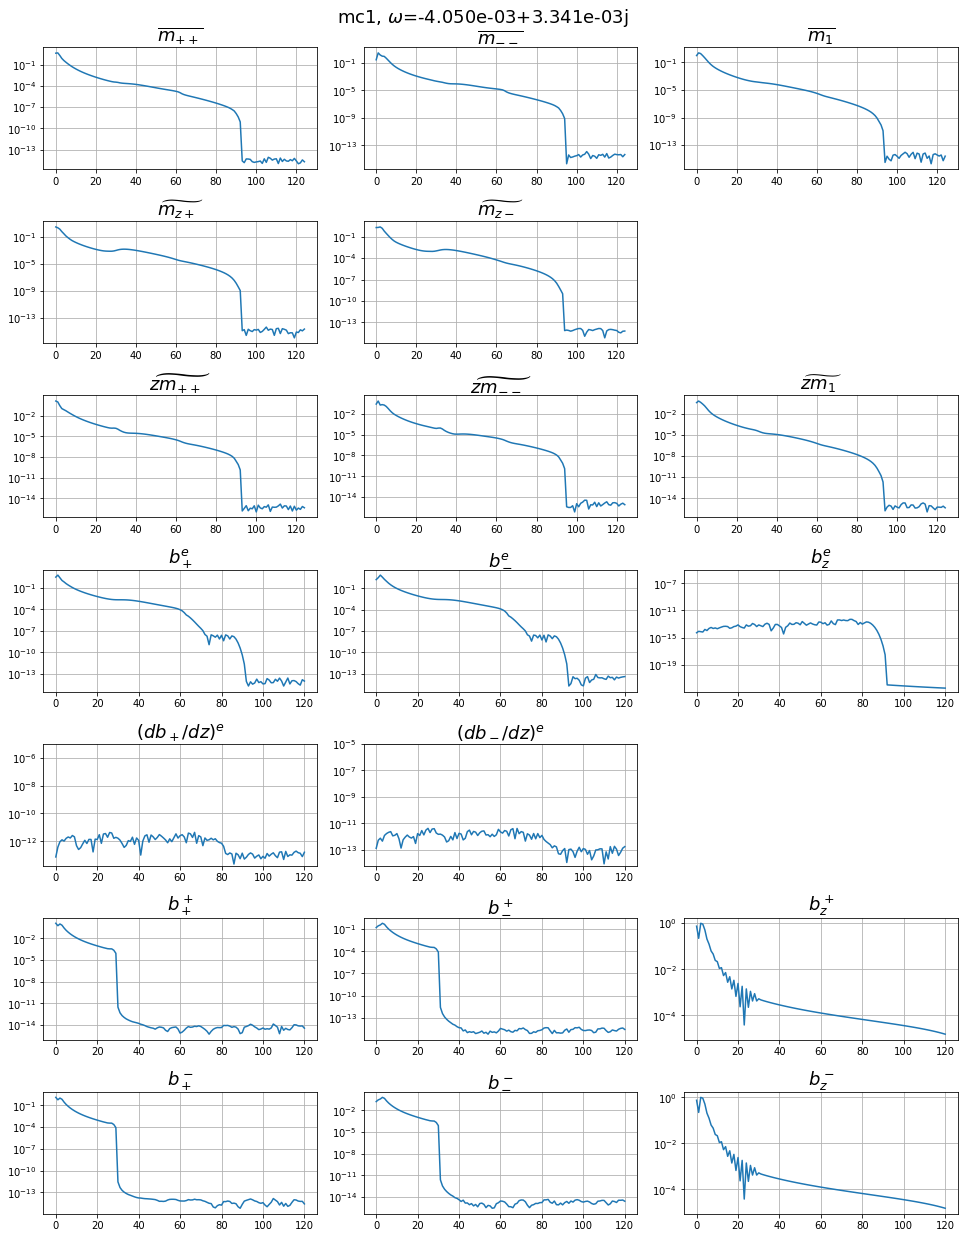

In [55]:
plot_fields = [
    ["M_p", "M_m", "M_1"], 
    ["M_zp", "M_zm", None],
    ["zM_p", "zM_m", "zM_1"],
    ["B_ep", "B_em", "Bz_e"],
    ["dB_dz_ep", "dB_dz_em", None],
    ["B_pp", "B_pm", "Bz_p"],
    ["B_mp", "B_mm", "Bz_m"]
]
plot_fnames = [
    [r'$\overline{m_{++}}$', r'$\overline{m_{--}}$', r'$\overline{m_{1}}$'],
    [r'$\widetilde{m_{z+}}$', r'$\widetilde{m_{z-}}$', None], 
    [r'$\widetilde{zm_{++}}$', r'$\widetilde{zm_{--}}$', r'$\widetilde{zm_{1}}$'],
    [r'$b_+^e$', r'$b_-^e$', r'$b_z^e$'],
    [r'$(db_+/dz)^e$', r'$(db_-/dz)^e$', None],
    [r'$b_+^+$', r'$b_-^+$', r'$b_z^+$'],
    [r'$b_+^-$', r'$b_-^-$', r'$b_z^-$']
]

# save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
save_name = None
override = False

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4.5, nrows*2.5))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        
        fname = plot_fields[i_r][i_c]        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in evec_proj_dict._block_idx) or (evec_proj_dict[fname] is None):
            ax.remove()
        else:
            f_plot = np.abs(evec_proj_dict[fname])
            ax.plot(f_plot)
            
            ax.set_yscale('log')
            if np.max(f_plot) < 1e-5:
                ax.set_ylim([None, 1e-5])
            ax.grid(which='both')
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)

fig.suptitle('{}, $\\omega$={:.3e}'.format(df_3d.Index[i_3d], eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

Validation

In [15]:
evec_proj = pg_3d.project_3d_to_conj(
    usp, bsp, mode_bg, spec_ctx, xpd_cfg.recipe, col_nrange, verbose=True
)

Elapse time =     6.61 (   +6.61) | Info: Grids for spectral transforms generated.
Elapse time =    47.24 (  +40.63) | Info: Evaluation of quadratic moments complete.
Elapse time =    48.68 (   +1.44) | Info: Evaluation of equatorial field complete.
Elapse time =    49.78 (   +1.10) | Info: Evaluation of boundary fields complete.
Elapse time =    49.80 (   +0.02) | Info: Spectral transform complete.


In [119]:
evec_proj_dict = nmatrix.LabeledBlockArray(evec_proj, cnames, ranges_trial)

In [124]:
evec_proj_dict._array is evec_proj

True

In [25]:
from pg_utils.numerics import matrices as nmatrix

evec_mode_pg = nmatrix.LabeledBlockArray(evec_proj, cnames, ranges_trial)
evec_mode_pg = base.LabeledCollection(cnames, 
    **{cname: evec_mode_pg[cname] for cname in cnames})
x_grid = specfun.roots_chebyt(100)[0]
s_grid = np.sqrt((1 + x_grid)/2)

def calc_field_eqrad_PG(fname, field_f):
    N_trial = field_nrange[fname]
    S_tmp, N_tmp = np.meshgrid(s_grid, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_tmp, 0., 0., N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_tmp[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    eval_rad = np.sum(eval_tmp, axis=-1)
    return eval_rad

eqrad_pg = field_func.apply(calc_field_eqrad_PG, inplace=False, metadata=True)

In [175]:
core.U_pg[1].subs({core.pgvar.Psi: xpd_cfg.recipe.base_expr[xpd_cfg.recipe.rad_xpd.bases.Psi]*xpd_cfg.recipe.fourier_xpd.bases.subs({core.t: 0})}).subs({core.H: core.H_s}).doit().simplify()

(s**(Abs(m) + 2)*(-(1 - s**2)*(2*\ell + 2*Abs(m) + 5)*jacobi(\ell - 1, 5/2, Abs(m) + 1, 2*s**2 - 1) + 3*jacobi(\ell, 3/2, Abs(m), 2*s**2 - 1)) - s**Abs(m)*(1 - s**2)*Abs(m)*jacobi(\ell, 3/2, Abs(m), 2*s**2 - 1))*exp(I*\phi*m)/s

In [172]:
xpd_cfg.recipe.base_expr[xpd_cfg.recipe.rad_xpd.bases.Psi]*xpd_cfg.recipe.fourier_xpd.bases.subs({core.t: 0})

s**Abs(m)*H(s)**3*exp(I*\phi*m)*jacobi(\ell, 3/2, Abs(m), 2*s**2 - 1)

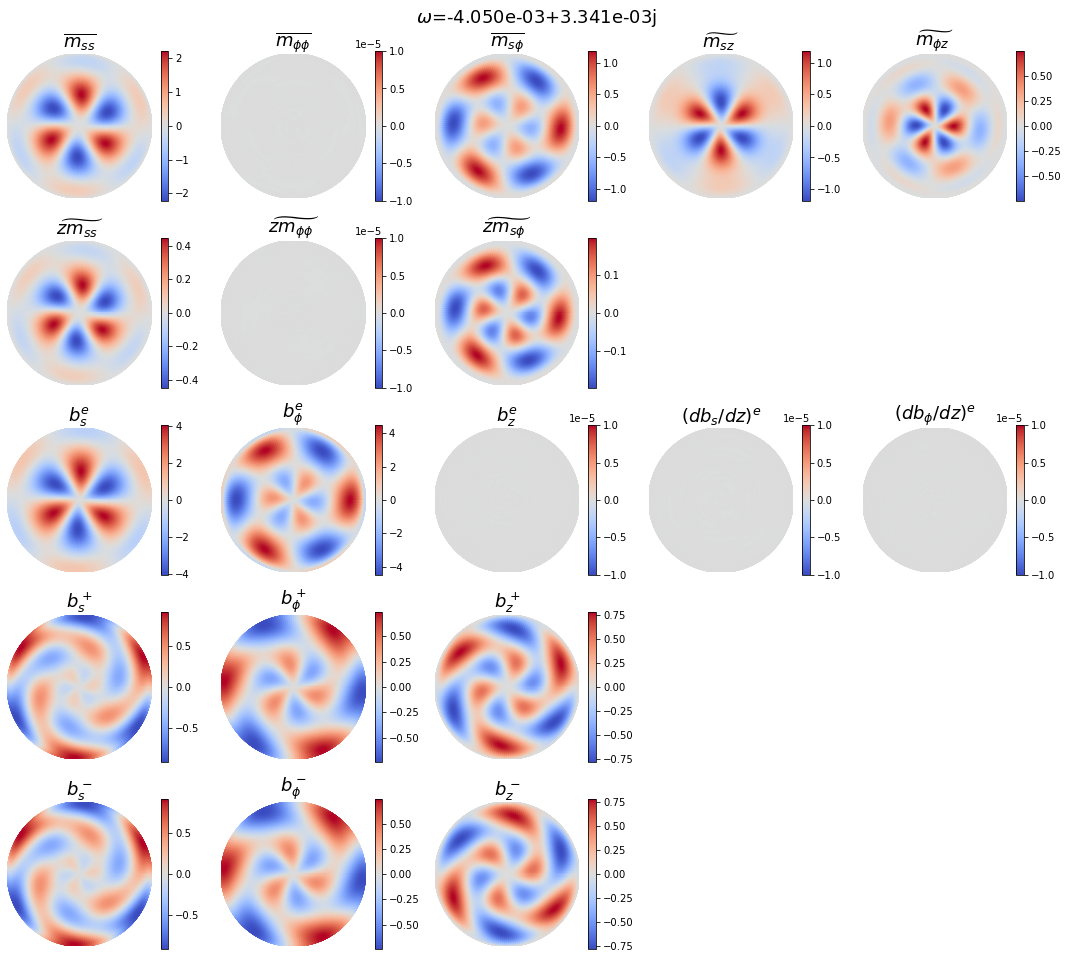

In [26]:
plot_fields = [
    ["Mss", "Mpp", "Msp", "Msz", "Mpz"], 
    ["zMss", "zMpp", "zMsp", None, None],
    ["Bs_e", "Bp_e", "Bz_e", "dBs_dz_e", "dBp_dz_e"],
    ["Bs_p", "Bp_p", "Bz_p", None, None],
    ["Bs_m", "Bp_m", "Bz_m", None, None]
]
plot_fnames = [
    [r'$\overline{m_{ss}}$', r'$\overline{m_{\phi\phi}}$', r'$\overline{m_{s\phi}}$', r'$\widetilde{m_{sz}}$', r'$\widetilde{m_{\phi z}}$'], 
    [r'$\widetilde{zm_{ss}}$', r'$\widetilde{zm_{\phi\phi}}$', r'$\widetilde{zm_{s\phi}}$', None, None],
    [r'$b_s^e$', r'$b_\phi^e$', r'$b_z^e$', r'$(db_s/dz)^e$', r'$(db_\phi/dz)^e$'],
    [r'$b_s^+$', r'$b_\phi^+$', r'$b_z^+$', None, None],
    [r'$b_s^-$', r'$b_\phi^-$', r'$b_z^-$', None, None]
]

# save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
save_name = None
override = False

norm_3d = 1
p_array = np.linspace(0, 2*np.pi, num=201)
anchor_phase_3d = 1/eqrad_pg['Bp_e'].flatten()[np.argmax(np.abs(eqrad_pg['Bp_e']))]
p_cst_3d = np.angle(anchor_phase_3d)/m_val
p_factor_3d = np.exp(1j*m_val*(p_array + p_cst_3d))

S_eq, P_eq = np.meshgrid(s_grid, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*2.7))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        
        fname = plot_fields[i_r][i_c]        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eqrad_pg._field_names) or (eqrad_pg[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_3d, eqrad_pg[fname])/norm_3d)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")

fig.suptitle('$\\omega$={:.3e}'.format(eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

### Velocity field

In [160]:
from pg_utils.numerics import special

def basis_psi(m, n, s):
    xi = 2*s**2 - 1
    return s**m*(1 - s**2)**(3/2)*specfun.eval_jacobi(n, 3/2, m, xi)

def basis_u_s(m, n, s):
    xi = 2*s**2 - 1
    return 1j*m*s**(m-1)*(1-s**2)*specfun.eval_jacobi(n, 3/2, m, xi)

def basis_u_p(m, n, s):
    xi = 2*s**2 - 1
    return s**(m-1)*(3*s**2 - m*(1-s**2))*specfun.eval_jacobi(n, 3/2, m, xi) - s**(m + 1)*(1 - s**2)*(n + m + 5/2)*specfun.eval_jacobi(n-1, 5/2, m+1, xi)

def basis_u_s_recur(m, N, s):
    xi = 2*s**2 - 1
    H = np.sqrt(1 - s**2)
    return (1j*m*H**2*s**(m-1))*special.eval_jacobi_recur_Nmax(N, 3/2, m, xi)

def basis_u_p_recur(m, N, s):
    xi = 2*s**2 - 1
    H = np.sqrt(1 - s**2)
    return s**(m-1)*(
        + (3*s**2 - m*H**2)*special.eval_jacobi_recur_Nmax(N, 3/2, m, xi)
        - np.einsum('i,j,ij->ij', np.arange(N + 1) + m + 5/2, (s*H)**2, np.r_[np.zeros((1, xi.size)), special.eval_jacobi_recur_Nmax(N-1, 5/2, m+1, xi)])
    )

def basis_zeta(m, n, s):
    xi = 2*s**2 - 1
    return (2*(n + 1)*(2*n + 2*m + 3) + m)*s**m*specfun.eval_jacobi(n, 3/2, m, xi)

#### Synthetic data

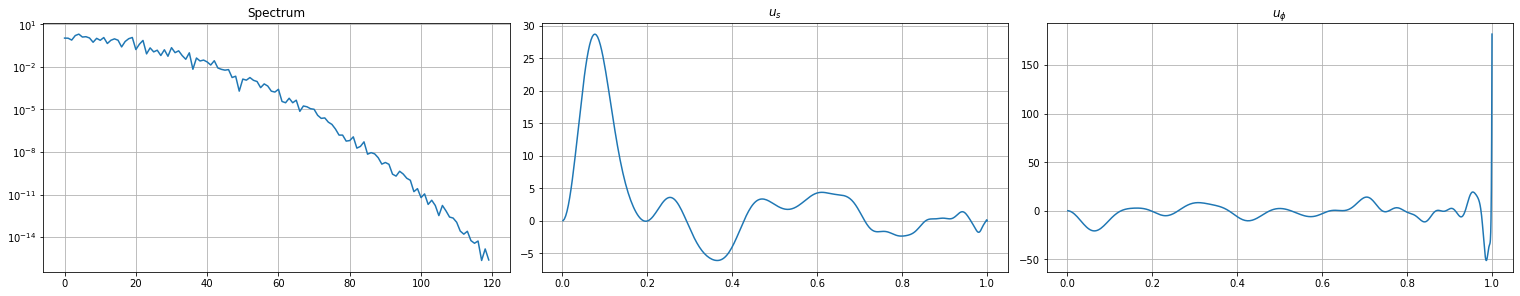

In [267]:
m_val = 3
Ntrunc = 120

rng = np.random.default_rng(42)
spec_syn_psi = np.exp(-np.arange(Ntrunc)**2/20**2)*(rng.normal(size=(Ntrunc,)) + 1j*rng.normal(size=(Ntrunc,)))

x_view = specfun.roots_chebyt(500)[0]
s_view = np.sqrt((1 + x_view)/2)

S_mesh, N_mesh = np.meshgrid(s_view, np.arange(Ntrunc), indexing='ij')
Phi_s = basis_u_s(m_val, N_mesh, S_mesh)
Phi_p = basis_u_p(m_val, N_mesh, S_mesh)
u_s_syn_view = Phi_s @ spec_syn_psi
u_p_syn_view = Phi_p @ spec_syn_psi

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 4), layout='constrained')

ax = axes[0]
ax.semilogy(np.abs(spec_syn_psi))
ax.grid(which='both')
ax.set_title('Spectrum')

ax = axes[1]
ax.plot(s_view, np.imag(u_s_syn_view))
ax.grid(which='both')
ax.set_title('$u_s$')

ax = axes[2]
ax.plot(s_view, np.real(u_p_syn_view))
ax.grid(which='both')
ax.set_title(r'$u_{\phi}$')

plt.show()

#### Least-squares reconstruction: synthetic test

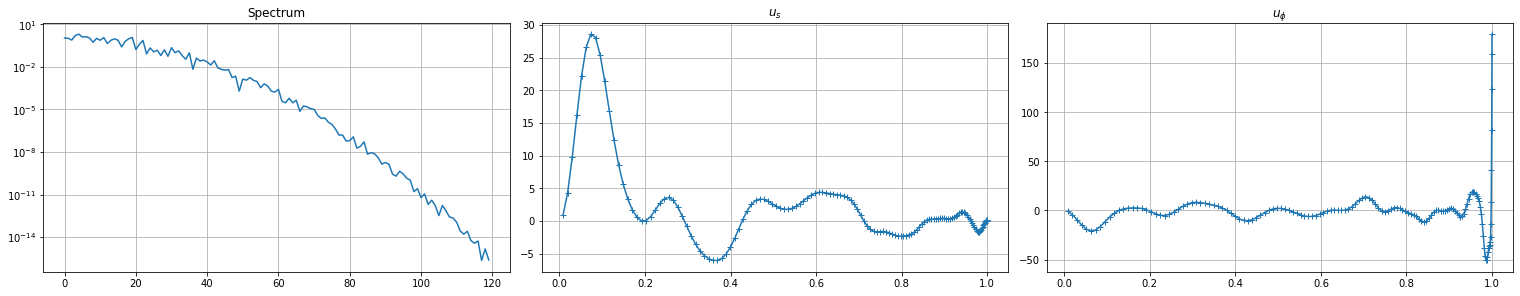

In [303]:
v_transform = base_f.JacobiPolar_2side(Ntrunc, 0, np.abs(np.abs(m_val) - 1), 1/2, np.abs(np.abs(m_val) - 1), qmode='lowest', dealias=1.2)
x_grid_v = v_transform.grid
s_grid_v = np.sqrt((1 + x_grid_v)/2)
w_quad_v = v_transform.wt_quad

white_noise = 0.

S_mesh, N_mesh = np.meshgrid(s_grid_v, np.arange(Ntrunc), indexing='ij')
Phi_s = basis_u_s(m_val, N_mesh, S_mesh)
Phi_p = basis_u_p(m_val, N_mesh, S_mesh)
u_s_syn = Phi_s @ spec_syn_psi + white_noise*(rng.normal(size=(s_grid_v.size)) + 1j*rng.normal(size=(s_grid_v.size)))
u_p_syn = Phi_p @ spec_syn_psi + white_noise*(rng.normal(size=(s_grid_v.size)) + 1j*rng.normal(size=(s_grid_v.size)))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 4), layout='constrained')

ax = axes[0]
ax.semilogy(np.abs(spec_syn_psi))
ax.grid(which='both')
ax.set_title('Spectrum')

ax = axes[1]
ax.plot(s_grid_v, np.imag(u_s_syn), '+-')
ax.grid(which='both')
ax.set_title('$u_s$')

ax = axes[2]
ax.plot(s_grid_v, np.real(u_p_syn), '+-')
ax.grid(which='both')
ax.set_title(r'$u_{\phi}$')

plt.show()

Stream function spectrum estimation

In [304]:
from scipy import linalg as sci_linalg

Phi_comb = (Phi_s.conj().T*w_quad_v) @ Phi_s + (Phi_p.conj().T*w_quad_v) @ Phi_p
b_comb = (Phi_s.conj().T*w_quad_v) @ u_s_syn + (Phi_p.conj().T*w_quad_v) @ u_p_syn
spec_rec_psi = sci_linalg.solve(Phi_comb, b_comb, assume_a='pos')

In [306]:
np.linalg.cond((Phi_s.conj().T*w_quad_v) @ Phi_s), np.linalg.cond((Phi_p.conj().T*w_quad_v) @ Phi_p), np.linalg.cond(Phi_comb)

(5633198.935859732, 874.9723051751139, 389.7223321551952)

Reconstruction diagnostics

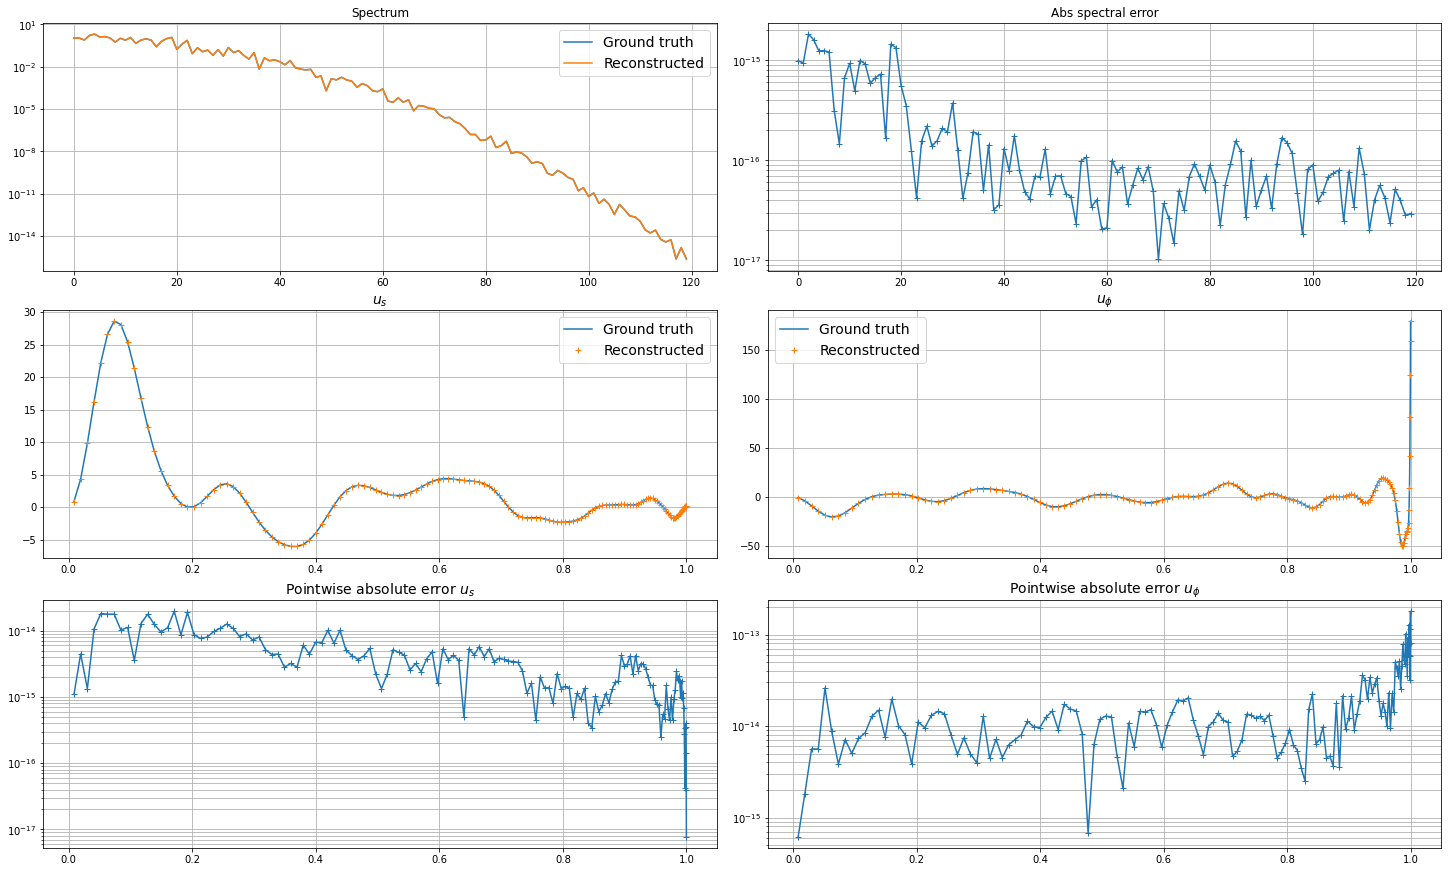

In [307]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12), layout='constrained')

ax = axes[0, 0]
ax.semilogy(np.abs(spec_syn_psi), label='Ground truth')
ax.semilogy(np.abs(spec_rec_psi), label='Reconstructed')
ax.grid(which='both')
ax.legend(fontsize=14)
ax.set_title('Spectrum')

ax = axes[0, 1]
ax.semilogy(np.abs(spec_syn_psi - spec_rec_psi), '+-')
ax.grid(which='both')
ax.set_title('Abs spectral error')

ax = axes[1, 0]
ax.plot(s_grid_v, np.imag(u_s_syn), label='Ground truth')
ax.plot(s_grid_v, np.imag(Phi_s @ spec_rec_psi), '+', label='Reconstructed')
ax.grid(which='both')
ax.legend(fontsize=14)
ax.set_title('$u_s$', fontsize=14)

ax = axes[1, 1]
ax.plot(s_grid_v, np.real(u_p_syn), label='Ground truth')
ax.plot(s_grid_v, np.real(Phi_p @ spec_rec_psi), '+', label='Reconstructed')
ax.grid(which='both')
ax.legend(fontsize=14)
ax.set_title(r'$u_{\phi}$', fontsize=14)

ax = axes[2, 0]
ax.semilogy(s_grid_v, np.abs(u_s_syn - Phi_s @ spec_rec_psi), '+-')
ax.grid(which='both')
ax.set_title('Pointwise absolute error $u_s$', fontsize=14)

ax = axes[2, 1]
ax.semilogy(s_grid_v, np.abs(u_p_syn - Phi_p @ spec_rec_psi), '+-')
ax.grid(which='both')
ax.set_title(r'Pointwise absolute error $u_{\phi}$', fontsize=14)

plt.show()

#### Using only the s-component

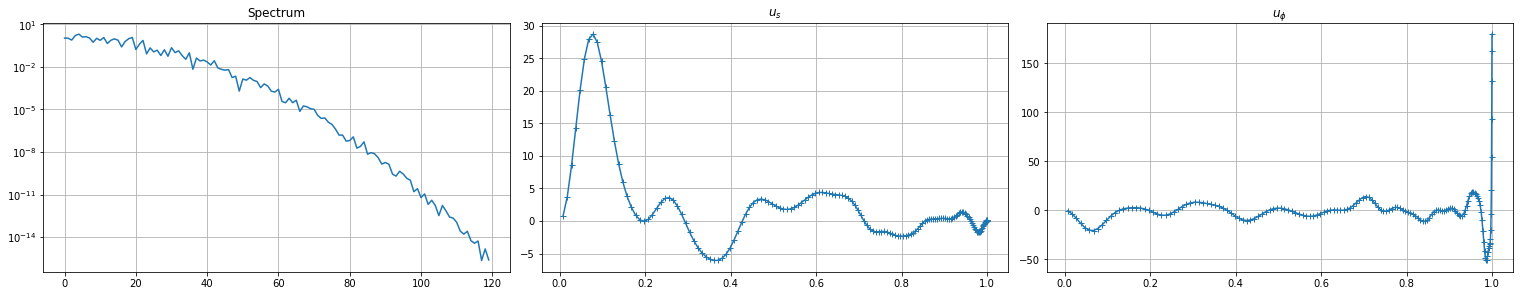

In [107]:
psi_transform = base_f.JacobiPolar_2side(Ntrunc, 3, np.abs(m_val), 3/2, np.abs(m_val), qmode='lowest', dealias=1.3)
x_grid_v = psi_transform.grid
s_grid_v = np.sqrt((1 + x_grid_v)/2)
w_quad_v = psi_transform.wt_quad

white_noise = 0.

S_mesh, N_mesh = np.meshgrid(s_grid_v, np.arange(Ntrunc), indexing='ij')
Phi_s = basis_u_s(m_val, N_mesh, S_mesh)
Phi_p = basis_u_p(m_val, N_mesh, S_mesh)
u_s_syn = Phi_s @ spec_syn_psi + white_noise*(rng.normal(size=(s_grid_v.size)) + 1j*rng.normal(size=(s_grid_v.size)))
u_p_syn = Phi_p @ spec_syn_psi + white_noise*(rng.normal(size=(s_grid_v.size)) + 1j*rng.normal(size=(s_grid_v.size)))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21, 4), layout='constrained')

ax = axes[0]
ax.semilogy(np.abs(spec_syn_psi))
ax.grid(which='both')
ax.set_title('Spectrum')

ax = axes[1]
ax.plot(s_grid_v, np.imag(u_s_syn), '+-')
ax.grid(which='both')
ax.set_title('$u_s$')

ax = axes[2]
ax.plot(s_grid_v, np.real(u_p_syn), '+-')
ax.grid(which='both')
ax.set_title(r'$u_{\phi}$')

plt.show()

Stream function spectrum estimation

In [112]:
psi_est = (s_grid_v*np.sqrt(1 - s_grid_v**2)/(1j*m_val))*u_s_syn
spec_rec_psi = psi_transform.transform_fwd(psi_est)

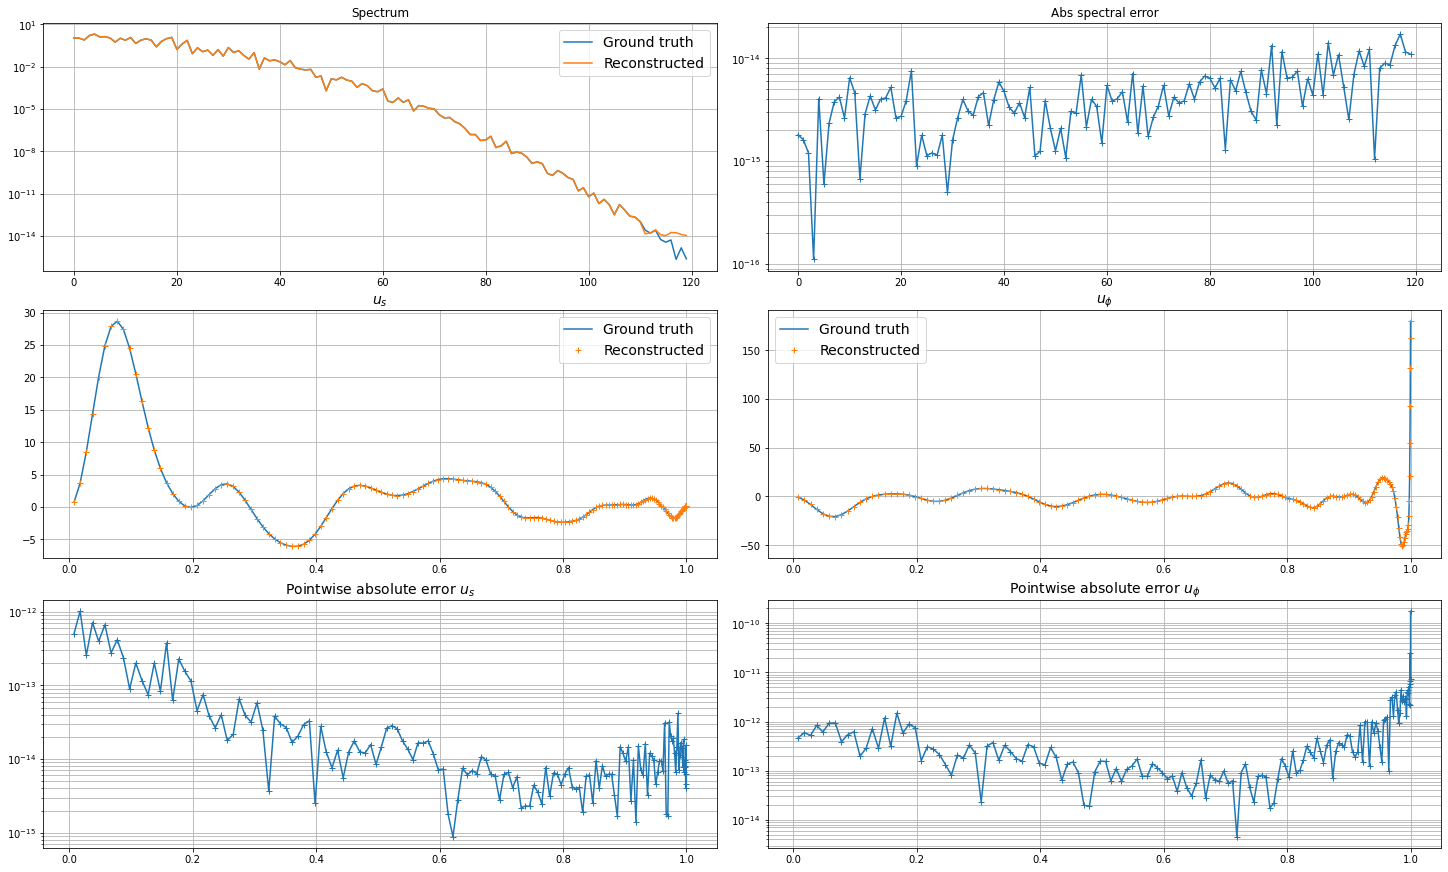

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 12), layout='constrained')

ax = axes[0, 0]
ax.semilogy(np.abs(spec_syn_psi), label='Ground truth')
ax.semilogy(np.abs(spec_rec_psi), label='Reconstructed')
ax.grid(which='both')
ax.legend(fontsize=14)
ax.set_title('Spectrum')

ax = axes[0, 1]
ax.semilogy(np.abs(spec_syn_psi - spec_rec_psi), '+-')
ax.grid(which='both')
ax.set_title('Abs spectral error')

ax = axes[1, 0]
ax.plot(s_grid_v, np.imag(u_s_syn), label='Ground truth')
ax.plot(s_grid_v, np.imag(Phi_s @ spec_rec_psi), '+', label='Reconstructed')
ax.grid(which='both')
ax.legend(fontsize=14)
ax.set_title('$u_s$', fontsize=14)

ax = axes[1, 1]
ax.plot(s_grid_v, np.real(u_p_syn), label='Ground truth')
ax.plot(s_grid_v, np.real(Phi_p @ spec_rec_psi), '+', label='Reconstructed')
ax.grid(which='both')
ax.legend(fontsize=14)
ax.set_title(r'$u_{\phi}$', fontsize=14)

ax = axes[2, 0]
ax.semilogy(s_grid_v, np.abs(u_s_syn - Phi_s @ spec_rec_psi), '+-')
ax.grid(which='both')
ax.set_title('Pointwise absolute error $u_s$', fontsize=14)

ax = axes[2, 1]
ax.semilogy(s_grid_v, np.abs(u_p_syn - Phi_p @ spec_rec_psi), '+-')
ax.grid(which='both')
ax.set_title(r'Pointwise absolute error $u_{\phi}$', fontsize=14)

plt.show()

#### Real data

In [310]:
evec_proj = pg_3d.project_3d_to_conj(
    usp, bsp, mode_bg, spec_ctx, xpd_cfg.recipe, col_nrange, psi_estimator='u_s', verbose=True
)

Elapse time =     6.59 (   +6.59) | Info: Grids for spectral transforms generated.
Elapse time =    44.75 (  +38.16) | Info: Estimation of stream function complete.
Elapse time =    86.01 (  +41.26) | Info: Evaluation of quadratic moments complete.
Elapse time =    87.78 (   +1.77) | Info: Evaluation of equatorial field complete.
Elapse time =    89.13 (   +1.36) | Info: Evaluation of boundary fields complete.
Elapse time =    89.16 (   +0.03) | Info: Spectral transform complete.


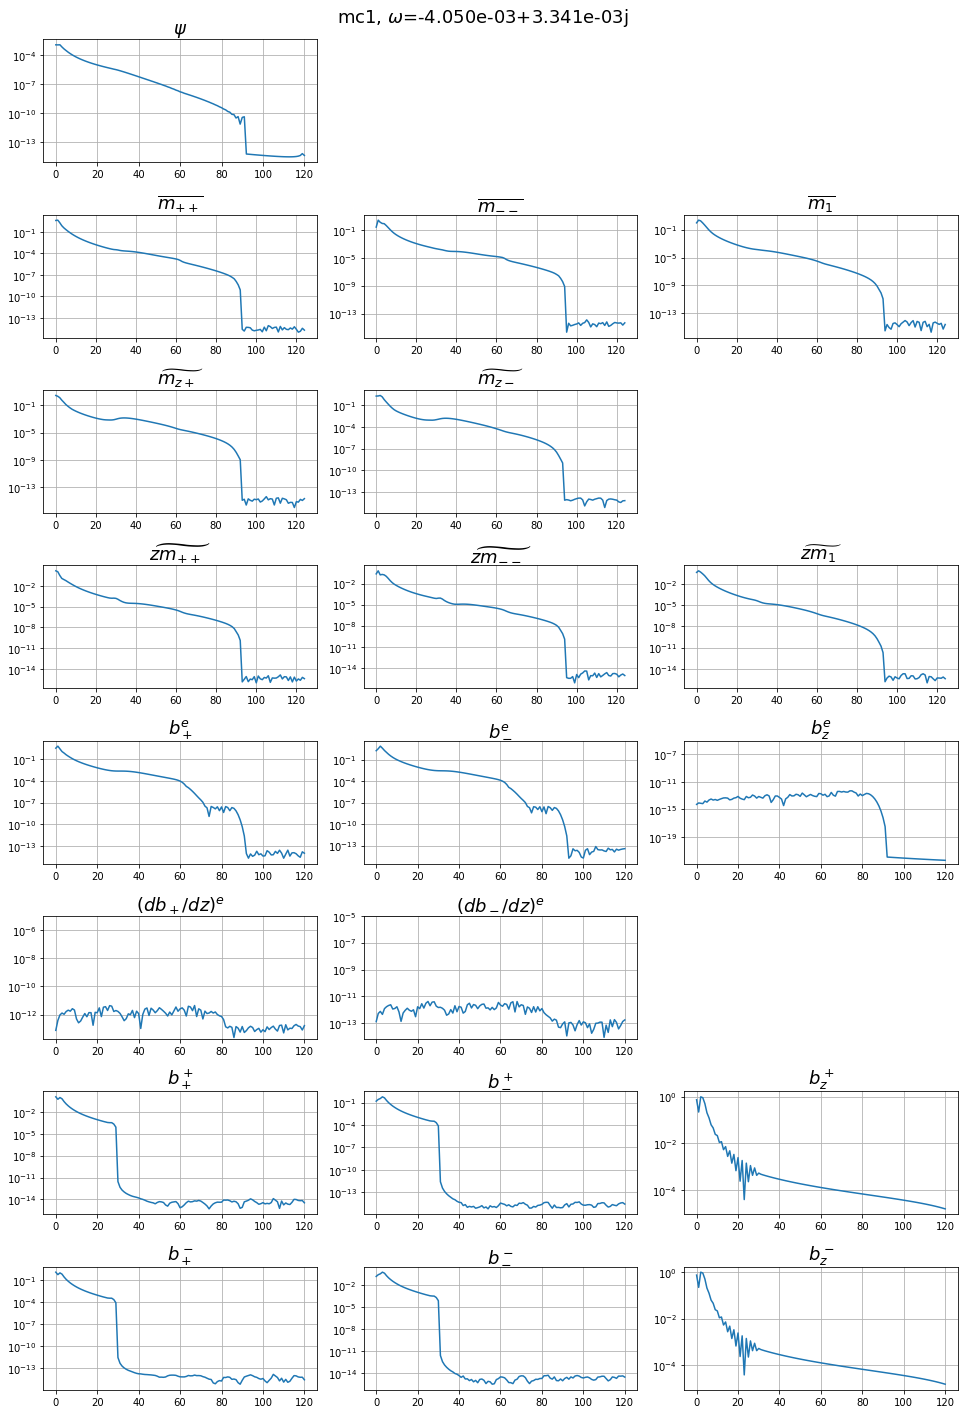

In [290]:
plot_fields = [
    ['Psi', None, None],
    ["M_p", "M_m", "M_1"], 
    ["M_zp", "M_zm", None],
    ["zM_p", "zM_m", "zM_1"],
    ["B_ep", "B_em", "Bz_e"],
    ["dB_dz_ep", "dB_dz_em", None],
    ["B_pp", "B_pm", "Bz_p"],
    ["B_mp", "B_mm", "Bz_m"]
]
plot_fnames = [
    [r'$\psi$', None, None],
    [r'$\overline{m_{++}}$', r'$\overline{m_{--}}$', r'$\overline{m_{1}}$'],
    [r'$\widetilde{m_{z+}}$', r'$\widetilde{m_{z-}}$', None], 
    [r'$\widetilde{zm_{++}}$', r'$\widetilde{zm_{--}}$', r'$\widetilde{zm_{1}}$'],
    [r'$b_+^e$', r'$b_-^e$', r'$b_z^e$'],
    [r'$(db_+/dz)^e$', r'$(db_-/dz)^e$', None],
    [r'$b_+^+$', r'$b_-^+$', r'$b_z^+$'],
    [r'$b_+^-$', r'$b_-^-$', r'$b_z^-$']
]

# save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
save_name = None
override = False

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4.5, nrows*2.5))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        
        fname = plot_fields[i_r][i_c]        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in evec_proj._block_idx) or (evec_proj[fname] is None):
            ax.remove()
        else:
            f_plot = np.abs(evec_proj[fname])
            ax.plot(f_plot)
            
            ax.set_yscale('log')
            if np.max(f_plot) < 1e-5:
                ax.set_ylim([None, 1e-5])
            ax.grid(which='both')
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)

fig.suptitle('{}, $\\omega$={:.3e}'.format(df_3d.Index[i_3d], eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

Comparing results from different stream function estimation

In [369]:
from pg_utils import tools as pg_tools
psi_spectra = dict()
timer = pg_tools.ProcTimer(start=True)
Nz = 65
Ns = 121

psi_transform = base_f.JacobiPolar_2side(Ns, 1, np.abs(m_val - 1), 3/2, np.abs(m_val - 1), qmode='lowest', dealias=1.2)
x_grid_psi = psi_transform.grid
s_grid_psi = np.sqrt((1 + x_grid_psi)/2)
w_grid_psi = psi_transform.wt_quad
psi_spectra['LSQ bulk v'], RMS_res = pg_3d.pg_spec_psi_vbulk_lsq(usp, xpd_cfg.recipe, Nz, m_val, Ns, s_grid_psi, w_grid_psi, RMS_misfit=True)
timer.flag(loginfo=f"Complete: LSQ reconstruction using volumetric v, misfit: {RMS_res: .4f}", print_str=True)

psi_transform = base_f.JacobiPolar_2side(Ns, 3, m_val, 3/2, m_val, qmode='lowest', dealias=1.2)
x_grid_psi = psi_transform.grid
s_grid_psi = np.sqrt((1 + x_grid_psi)/2)
psi_est = pg_3d.pg_phys_psi_f_vs_mean(usp, s_grid_psi, Nz, m_val)
psi_spectra['z-averaged vs'] = psi_transform.transform_fwd(psi_est)
timer.flag(loginfo="Complete: z-averaged v_s", print_str=True)

psi_transform = base_f.JacobiPolar_2side(Ns, 0, np.abs(m_val - 1), 1/2, np.abs(m_val - 1), qmode='lowest', dealias=1.2)
x_grid_psi = psi_transform.grid
s_grid_psi = np.sqrt((1 + x_grid_psi)/2)
w_grid_psi = psi_transform.wt_quad
psi_spectra['LSQ z-ave v_e'], RMS_res = pg_3d.pg_spec_psi_vmean_lsq(usp, xpd_cfg.recipe, Nz, m_val, Ns, s_grid_psi, w_grid_psi, RMS_misfit=True)
timer.flag(loginfo=f"Complete: LSQ reconstruction using z-averaged v_e, misfit: {RMS_res: .4f}", print_str=True)

Elapse time (0) =    38.28 | Info: Complete: LSQ reconstruction using volumetric v, misfit:  0.0986
Elapse time (0) =    74.42 | Info: Complete: z-averaged v_s
Elapse time (0) =   110.80 | Info: Complete: LSQ reconstruction using z-averaged v_e, misfit:  0.0000


In [381]:
np.linalg.norm(psi_spectra['z-averaged vs'] - psi_spectra['LSQ z-ave v_e'])/np.linalg.norm(psi_spectra['z-averaged vs'])

6.69275236501124e-07

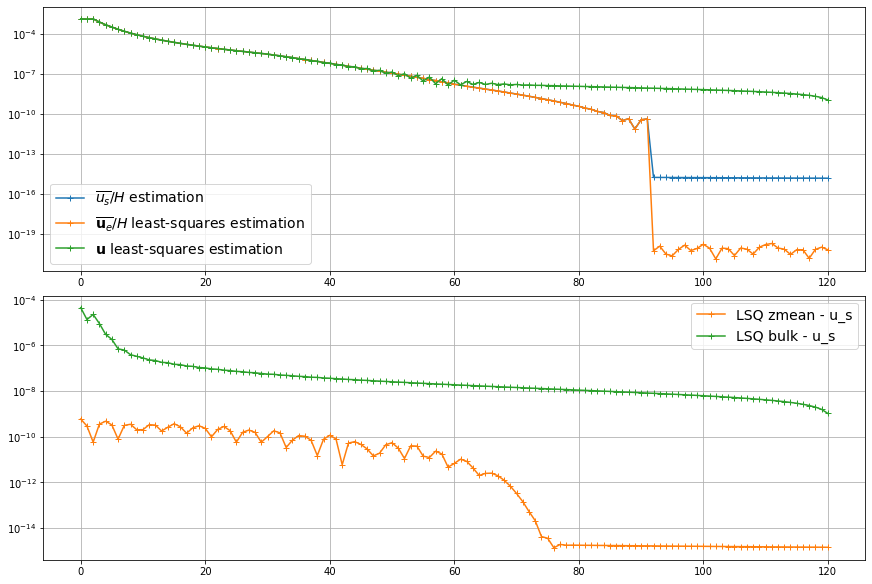

In [370]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), layout='constrained')

ax = axes[0]
ax.semilogy(np.abs(psi_spectra['z-averaged vs']), '+-', label=r'$\overline{u_s}/H$ estimation')
ax.semilogy(np.abs(psi_spectra['LSQ z-ave v_e']), '+-', label=r'$\overline{\mathbf{u}_e}/H$ least-squares estimation')
ax.semilogy(np.abs(psi_spectra['LSQ bulk v']), '+-', label=r'$\mathbf{u}$ least-squares estimation')
ax.grid(which='both')
ax.legend(fontsize=14)

ax = axes[1]
ax.semilogy(np.abs(psi_spectra['z-averaged vs'] - psi_spectra['LSQ z-ave v_e']), '+-', color='tab:orange', label=r'LSQ zmean - u_s')
ax.semilogy(np.abs(psi_spectra['z-averaged vs'] - psi_spectra['LSQ bulk v']), '+-', color='tab:green', label=r'LSQ bulk - u_s')
ax.grid(which='both')
ax.legend(fontsize=14)

plt.show()

Calculate PG result on meridional plane; since the set of grid is not natural grid for PG, this takes a while

In [201]:
R_mesh, T_mesh = np.meshgrid(rg, tg)
S_mesh, Z_mesh = R_mesh*np.sin(T_mesh), R_mesh*np.cos(T_mesh)

evec_mode_pg = base.LabeledCollection(cnames, 
    **{cname: evec_proj[cname] for cname in cnames})

def calc_field_meridional_PG(fname, field_f):
    if fname not in ("U_s", "U_p", "U_z", "Zeta", "Psi"):
        return None
    N_trial = field_nrange[fname]
    S_tmp, Z_tmp = np.stack([S_mesh,]*N_trial, axis=-1), np.stack([Z_mesh,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(S_mesh) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, 0., Z_tmp, N_tmp, *[vec for vec in evec_mode_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_mesh[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

eval_mode_pg = field_func.apply(calc_field_meridional_PG, inplace=False, metadata=True)

Calculate 3-D result on the meridional plane.

In [202]:
uphy_md = usp.physical_field(worland_transform, legendre_transform)
bphy_md = bsp.physical_field(worland_transform, legendre_transform)

u_sph = uphy_md.data
u_cyl = {
    's': u_sph['r']*np.sin(T_mesh) + u_sph['theta']*np.cos(T_mesh),
    'phi': u_sph['phi'],
    'z': u_sph['r']*np.cos(T_mesh) - u_sph['theta']*np.sin(T_mesh)
}
b_sph = bphy_md.at_phi(phi=0.)
b_cyl = {
    's': b_sph['r']*np.sin(T_mesh) + b_sph['theta']*np.cos(T_mesh),
    'phi': b_sph['phi'],
    'z': b_sph['r']*np.cos(T_mesh) - b_sph['theta']*np.sin(T_mesh)
}
fields_3d = {
    'U_s': u_cyl['s'], 'U_p': u_cyl['phi'], 'U_z': u_cyl['z'],
    'B_s': b_cyl['s'], 'B_p': b_cyl['phi'], 'B_z': b_cyl['z']
}

Choose phase

In [214]:
anchor_phase = 1/u_cyl['s'][np.unravel_index(np.argmax(np.abs(u_cyl['s'])), u_cyl['s'].shape)]
p_cst = np.angle(anchor_phase)/m_val + np.pi/3
p_factor = np.exp(1j*m_val*p_cst)

C:\Users\gentle\AppData\Local\Temp\ipykernel_21188\4067591204.py:86: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


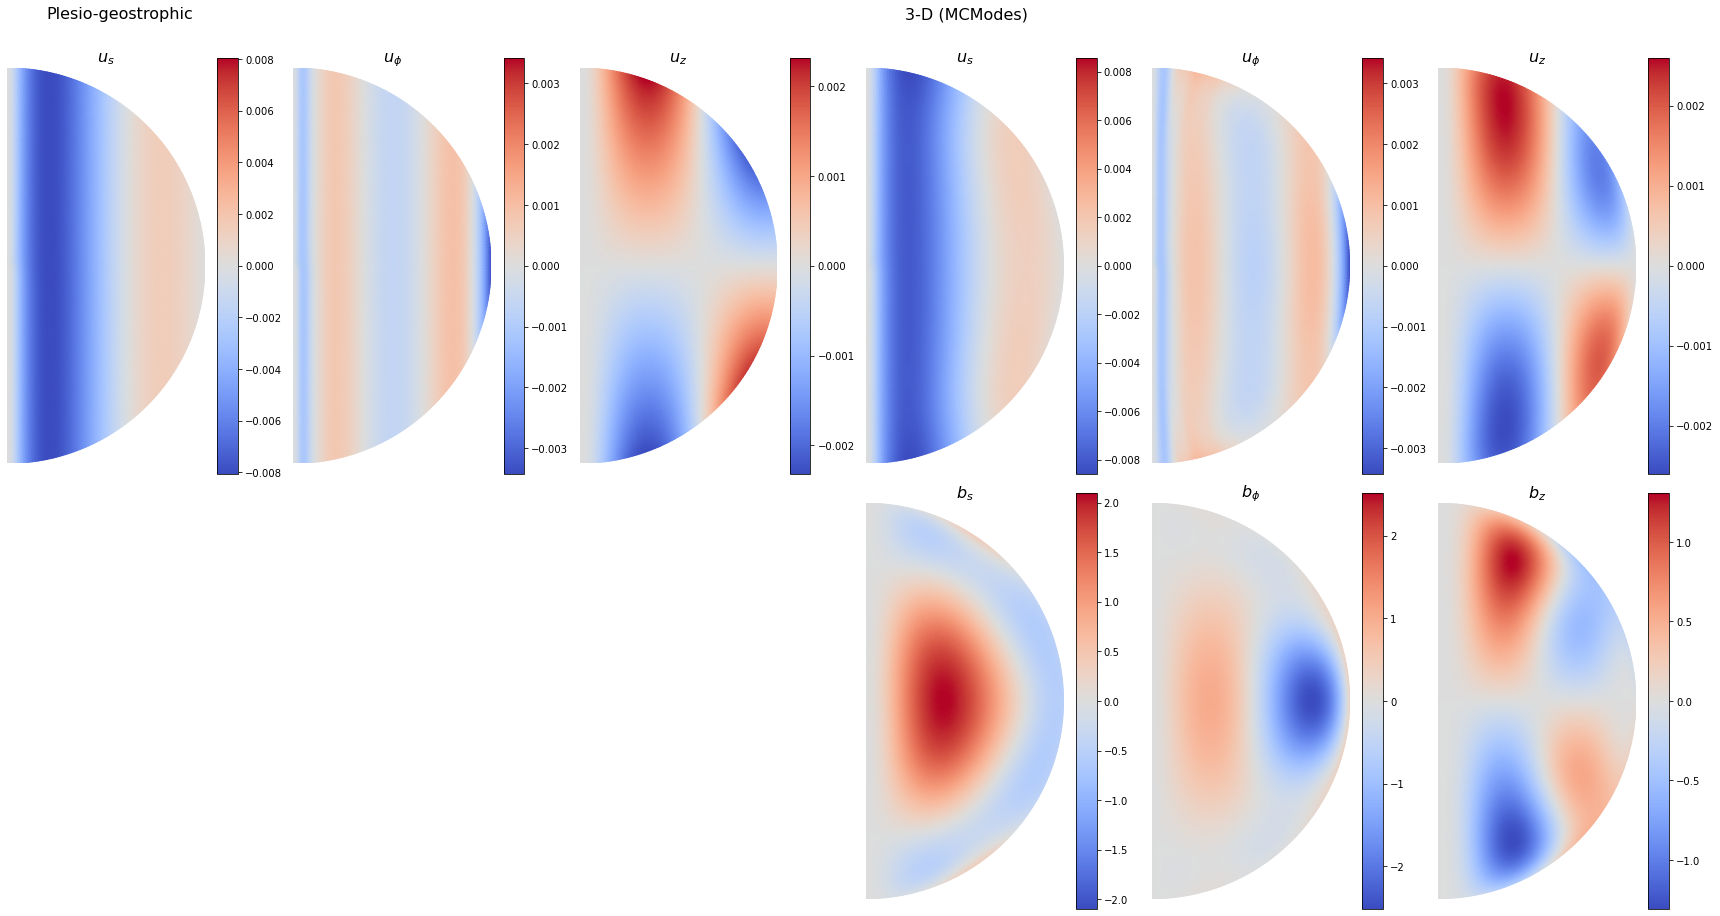

In [215]:
plot_fields = [
    ["U_s", "U_p", "U_z", ],
    ["B_s", "B_p", "B_z", ]
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
    [r"$b_s$", r"$b_\phi$", r"$b_z$", ]
]

save_name = None
override = False

force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(2*ncols*4, 2*nrows*3.2))
axes = np.atleast_2d(axes)

norm_pg = 1
norm_3d = 1

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        # PG plot
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eval_mode_pg._field_names) or (eval_mode_pg[fname] is None):
            ax.remove()
        else:
            f_eval = np.real(p_factor*eval_mode_pg[fname]/norm_pg)
            if np.abs(f_eval).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(f_eval))
                    # climit = 0.2
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, 'Plesio-geostrophic', fontsize=16)
        
        ax = axes[i_r][ncols + i_c]
        if (fname is None) or (fname not in fields_3d) or (fields_3d[fname] is None):
            ax.remove()
        else:
            field_plot = np.real(p_factor*fields_3d[fname]/norm_3d)
            if np.abs(field_plot).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(field_plot))
                    # climit = 0.6
                    # if fname == 'U_p':
                    #     climit = np.max(np.abs(field_plot[S_mesh < 0.6]))
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, '3-D (MCModes)', fontsize=16)

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

In [247]:
for comp in ['U_s', 'U_p', 'U_z']:
    rmsd_norm = np.linalg.norm((fields_3d[comp] - eval_mode_pg[comp]).flatten())/np.linalg.norm((fields_3d[comp]).flatten())
    norm_3d = np.linalg.norm(fields_3d[comp].flatten())
    print("Component {} | RMS L2-norm difference: {:4f} | Norm: {:4f}".format(comp, rmsd_norm, norm_3d))

Component U_s | RMS L2-norm difference: 0.033228 | Norm: 0.709235
Component U_p | RMS L2-norm difference: 0.055285 | Norm: 0.371301
Component U_z | RMS L2-norm difference: 0.350361 | Norm: 0.146036


In [358]:
psi_spectra.keys()

dict_keys(['LSQ bulk v', 'z-averaged vs', 'LSQ z-ave v_e'])

In [372]:
from pg_utils.numerics import utils as nutils

z_grid_v, wt = specfun.roots_legendre(101)
H_grid_v = np.sqrt(1 - s_grid_v**2)
z_quad_v = np.outer(z_grid_v, H_grid_v)
s_quad_v = np.ones_like(z_quad_v)*s_grid_v

def calc_field_meridional_PG(fname, field_f, psi_spec):
    N_trial = field_nrange[fname]
    S_tmp, Z_tmp = np.stack([s_quad_v,]*N_trial, axis=-1), np.stack([z_quad_v,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(s_quad_v) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, 0., Z_tmp, N_tmp, psi_spec, *([vec for vec in evec_mode_pg][1:]))
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(s_quad_v[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

u_val_pg = {
    comp: [
        calc_field_meridional_PG('U_s', field_func.U_s, psi_spectra[comp]), 
        calc_field_meridional_PG('U_p', field_func.U_p, psi_spectra[comp]), 
        calc_field_meridional_PG('U_z', field_func.U_z, psi_spectra[comp]), 
    ]
    for comp in psi_spectra
}

In [346]:
r_pts, t_pts, p_pts = nutils.coord_cart2sph(s_quad_v.flatten(), np.array(0.), z_quad_v.flatten())

u_val = usp.evaluate(r_pts, t_pts, 0.)
u_val = nutils.vector_sph2cyl(u_val['r'], u_val['theta'], u_val['phi'], r_pts, t_pts, p_pts)[:3]
u_val = {
    's': u_val[0].reshape(z_quad_v.shape),
    'p': u_val[1].reshape(z_quad_v.shape),
    'z': u_val[2].reshape(z_quad_v.shape),
}

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), width_ratios=[5, 1], layout='constrained')

# markers = ['x-', '^-', 'v-']
markers_real = [
    {'color': 'darkcyan'},
    {'color': 'c'},
    {'color': 'cyan'},
]

markers_imag = [
    {'color': 'darkmagenta'},
    {'color': 'm'},
    {'color': 'magenta'},
]

i_s = 100

ax = axes[0, 0]
ax.plot(z_grid_v, np.real(u_val['s'][:, i_s]), 'b+-', label='Real')
ax.plot(z_grid_v, np.imag(u_val['s'][:, i_s]), 'r+-', label='Imag')
for i_k, key in enumerate(u_val_pg):
    ax.plot(z_grid_v, np.real(u_val_pg[key][0][:, i_s]), **markers_real[i_k], label=f'Real [{key}]')
    ax.plot(z_grid_v, np.imag(u_val_pg[key][0][:, i_s]), **markers_imag[i_k], label=f'Imag [{key}]')
ax.grid(which='both')
ax.set_ylabel(r'$u_s$', fontsize=14)
ylim = ax.get_ylim()
ax.set_ylim([min([ylim[0], 0]), max([ylim[1], 0])])
ax.legend(fontsize=14, ncols=4)

ax = axes[1, 0]
ax.plot(z_grid_v, np.real(u_val['p'][:, i_s]), 'b+-', label='Real')
ax.plot(z_grid_v, np.imag(u_val['p'][:, i_s]), 'r+-', label='Imag')
for i_k, key in enumerate(u_val_pg):
    ax.plot(z_grid_v, np.real(u_val_pg[key][1][:, i_s]), **markers_real[i_k], label=f'Real [{key}]')
    ax.plot(z_grid_v, np.imag(u_val_pg[key][1][:, i_s]), **markers_imag[i_k], label=f'Imag [{key}]')
ax.grid(which='both')
ax.set_ylabel(r'$u_\phi$', fontsize=14)
ylim = ax.get_ylim()
ax.set_ylim([min([ylim[0], 0]), max([ylim[1], 0])])
ax.legend(fontsize=14, ncols=4)

ax = axes[2, 0]
ax.plot(z_grid_v, np.real(u_val['z'][:, i_s]), 'b+-', label='Real')
ax.plot(z_grid_v, np.imag(u_val['z'][:, i_s]), 'r+-', label='Imag')
for i_k, key in enumerate(u_val_pg):
    ax.plot(z_grid_v, np.real(u_val_pg[key][2][:, i_s]), **markers_real[i_k], label=f'Real [{key}]')
    ax.plot(z_grid_v, np.imag(u_val_pg[key][2][:, i_s]), **markers_imag[i_k], label=f'Imag [{key}]')
ax.grid(which='both')
ax.set_ylabel(r'$u_z$', fontsize=14)
ylim = ax.get_ylim()
ax.set_ylim([min([ylim[0], 0]), max([ylim[1], 0])])
ax.legend(fontsize=14, ncols=4)

fig.suptitle(f's={s_grid_v[i_s]:.4f}')

#========================= Meridional plot ================================================

plot_fields = [
    ["s", "p", "z", ],
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
]
force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*6.4))
# axes = np.atleast_2d(axes)
norm_3d = 1

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        ax = axes[i_c][1]
        if (fname is None) or (fname not in u_val) or (u_val[fname] is None):
            ax.remove()
        else:
            # field_plot = np.real(p_factor*fields_3d[fname]/norm_3d)
            field_plot = np.real(u_val[fname]/norm_3d)
            if np.abs(field_plot).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(field_plot))
                    cm = ax.pcolormesh(s_quad_v, z_quad_v, field_plot, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    ax.vlines([s_grid_v[i_s],], -1, 1, color='k')
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(s_quad_v, z_quad_v, field_plot, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(s_quad_v, z_quad_v, field_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, '3-D (MCModes)', fontsize=16)

plt.show()

### Combined

In [18]:
evec_proj = pg_3d.project_3d_to_conj(
    usp, bsp, mode_bg, spec_ctx, xpd_cfg.recipe, col_nrange, psi_estimator='u_s', verbose=True
)

Elapse time =     6.64 (   +6.64) | Info: Grids for spectral transforms generated.
Elapse time =    44.59 (  +37.95) | Info: Estimation of stream function complete.
Elapse time =    81.86 (  +37.27) | Info: Evaluation of quadratic moments complete.
Elapse time =    83.27 (   +1.42) | Info: Evaluation of equatorial field complete.
Elapse time =    84.37 (   +1.10) | Info: Evaluation of boundary fields complete.
Elapse time =    84.40 (   +0.02) | Info: Spectral transform complete.


In [34]:
with h5py.File('./out/eigen/S_L2_N1/Canonical/eigen_f3dsym_Lu2e+4_Le1e-4_3DL75N66-PGN120.h5', 'r') as fread:
    basis_names = fread['bases']['names'].asstr()[()]
    basis_ranges = fread['bases']['ranges'][()]
    eigvals_pgf3d = fread['eigval'][()]
    eigvecs_pgf3d = fread['eigvec'][()]

In [35]:
from pg_utils.numerics import matrices as nmatrix

evec_proj = nmatrix.LabeledBlockArray(eigvecs_pgf3d[:, i_3d], basis_names, basis_ranges)

In [31]:
evec_proj_comp = nmatrix.LabeledBlockArray(eigvecs_pgf3d[:, i_3d], basis_names, basis_ranges)

In [32]:
evec_proj._array - evec_proj_comp._array

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [76]:
with h5py.File('../Modes_3D/MCmodes/runs/QGP-SL2N2_Le1e-4_Lu2e+4_m3/eigenmodes.h5', 'r') as f1:
    with h5py.File('../Modes_3D/MCmodes/runs/QGP-SL2N2_Le1e-4_Lu2e+4_m3/eigenmodes_traced.h5', 'r') as f2:
        print(f1['eigenmode_target1']['eigenvecs'][:, 0])
        print(f2['Resolution_0']['eigenvecs'][:, 1])
        print(np.linalg.norm(f1['eigenmode_target1']['eigenvecs'][:, 0] - f2['Resolution_0']['eigenvecs'][:, 1])/np.linalg.norm(f2['Resolution_0']['eigenvecs'][:, 1]))
        print(np.max(np.abs(f1['eigenmode_target1']['eigenvecs'][:, 0] - f2['Resolution_0']['eigenvecs'][:, 1])))

[-1.62122106e-18-9.03275935e-18j -2.13452303e-18-8.85996463e-18j
 -2.00407995e-18-7.35902225e-18j ... -2.98155597e-19+1.08420217e-19j
 -6.23416249e-19-1.74488787e-19j  5.79370536e-19+8.02987234e-19j]
[-2.91403138e-18+1.67714436e-18j -3.21524774e-18+1.43510089e-18j
 -5.46163193e-19+1.31115196e-18j ... -1.64891563e-19+1.14719338e-18j
 -4.50890468e-19-1.27582084e-19j  5.06877041e-19-2.56867370e-19j]
2.0360422521190512e-05
1.4975246252232157e-05


In [19]:
with h5py.File('../Modes_3D/MCmodes/runs/QGP-SL2N2_Le1e-4_Lu2e+4_m3/eigenmodes_traced.h5', 'r') as f2:
    gp = f2['Resolution_1']
    print(gp.attrs['N'], gp.attrs['L'], gp.attrs['m'])

66 75 3


#### Check spectra

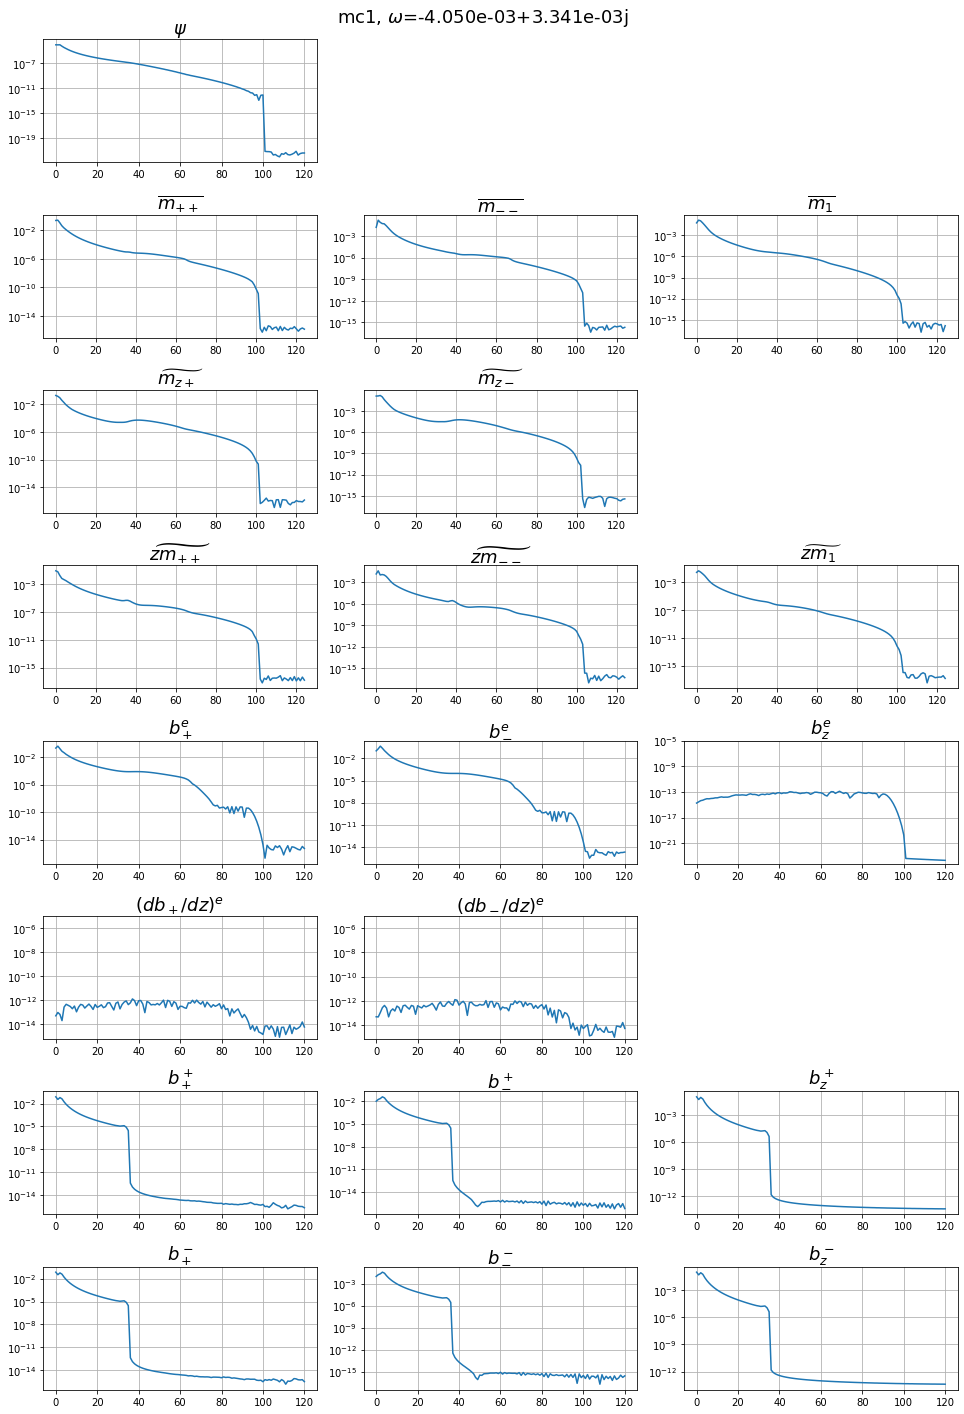

In [36]:
plot_fields = [
    ['Psi', None, None],
    ["M_p", "M_m", "M_1"], 
    ["M_zp", "M_zm", None],
    ["zM_p", "zM_m", "zM_1"],
    ["B_ep", "B_em", "Bz_e"],
    ["dB_dz_ep", "dB_dz_em", None],
    ["B_pp", "B_pm", "Bz_p"],
    ["B_mp", "B_mm", "Bz_m"]
]
plot_fnames = [
    [r'$\psi$', None, None],
    [r'$\overline{m_{++}}$', r'$\overline{m_{--}}$', r'$\overline{m_{1}}$'],
    [r'$\widetilde{m_{z+}}$', r'$\widetilde{m_{z-}}$', None], 
    [r'$\widetilde{zm_{++}}$', r'$\widetilde{zm_{--}}$', r'$\widetilde{zm_{1}}$'],
    [r'$b_+^e$', r'$b_-^e$', r'$b_z^e$'],
    [r'$(db_+/dz)^e$', r'$(db_-/dz)^e$', None],
    [r'$b_+^+$', r'$b_-^+$', r'$b_z^+$'],
    [r'$b_+^-$', r'$b_-^-$', r'$b_z^-$']
]

# save_name = './out/eigen/S1_T2_std/Canonical/Mode_ideal_equa_Le1e-4_m3-mc7_PGC-3DLu2e+4'
save_name = None
override = False

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4.5, nrows*2.5))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        
        fname = plot_fields[i_r][i_c]        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in evec_proj._block_idx) or (evec_proj[fname] is None):
            ax.remove()
        else:
            f_plot = np.abs(evec_proj[fname])
            ax.plot(f_plot)
            
            ax.set_yscale('log')
            if np.max(f_plot) < 1e-5:
                ax.set_ylim([None, 1e-5])
            ax.grid(which='both')
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)

fig.suptitle('{}, $\\omega$={:.3e}'.format(df_3d.Index[i_3d], eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

In [50]:
with h5py.File('../Modes_3D/MCmodes/runs/QGP-SL2N2_Le1e-4_Lu2e+4_m3/eigenmodes_traced.h5', 'r') as fread:
    print(fread['Resolution_3'].attrs['L'], fread['Resolution_3'].attrs['N'], fread['Resolution_3'].attrs['m'])

99 72 3


#### Validate meridional slice

Calculate PG result on meridional plane; since the set of grid is not natural grid for PG, this takes a while

In [24]:
R_mesh, T_mesh = np.meshgrid(rg, tg)
S_mesh, Z_mesh = R_mesh*np.sin(T_mesh), R_mesh*np.cos(T_mesh)

evec_pg_f_3d = base.LabeledCollection(cnames, 
    **{cname: evec_proj[cname] for cname in cnames})

def calc_field_meridional_PG(fname, field_f, evec_pg):
    if fname not in ("U_s", "U_p", "U_z", "Zeta", "Psi"):
        return None
    N_trial = field_nrange[fname]
    S_tmp, Z_tmp = np.stack([S_mesh,]*N_trial, axis=-1), np.stack([Z_mesh,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(S_mesh) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, 0., Z_tmp, N_tmp, *[vec for vec in evec_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_mesh[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

eval_pg_f_3d = field_func.apply(lambda fname, x: calc_field_meridional_PG(fname, x, evec_pg_f_3d), inplace=False, metadata=True)

Calculate 3-D result on the meridional plane.

In [25]:
uphy_md = usp.physical_field(worland_transform, legendre_transform)
bphy_md = bsp.physical_field(worland_transform, legendre_transform)

u_sph = uphy_md.data
u_cyl = {
    's': u_sph['r']*np.sin(T_mesh) + u_sph['theta']*np.cos(T_mesh),
    'phi': u_sph['phi'],
    'z': u_sph['r']*np.cos(T_mesh) - u_sph['theta']*np.sin(T_mesh)
}
b_sph = bphy_md.at_phi(phi=0.)
b_cyl = {
    's': b_sph['r']*np.sin(T_mesh) + b_sph['theta']*np.cos(T_mesh),
    'phi': b_sph['phi'],
    'z': b_sph['r']*np.cos(T_mesh) - b_sph['theta']*np.sin(T_mesh)
}
fields_3d = {
    'U_s': u_cyl['s'], 'U_p': u_cyl['phi'], 'U_z': u_cyl['z'],
    'B_s': b_cyl['s'], 'B_p': b_cyl['phi'], 'B_z': b_cyl['z']
}

Choose phase

In [26]:
anchor_phase = 1/u_cyl['s'][np.unravel_index(np.argmax(np.abs(u_cyl['s'])), u_cyl['s'].shape)]
p_cst = np.angle(anchor_phase)/m_val + np.pi/3
p_factor = np.exp(1j*m_val*p_cst)

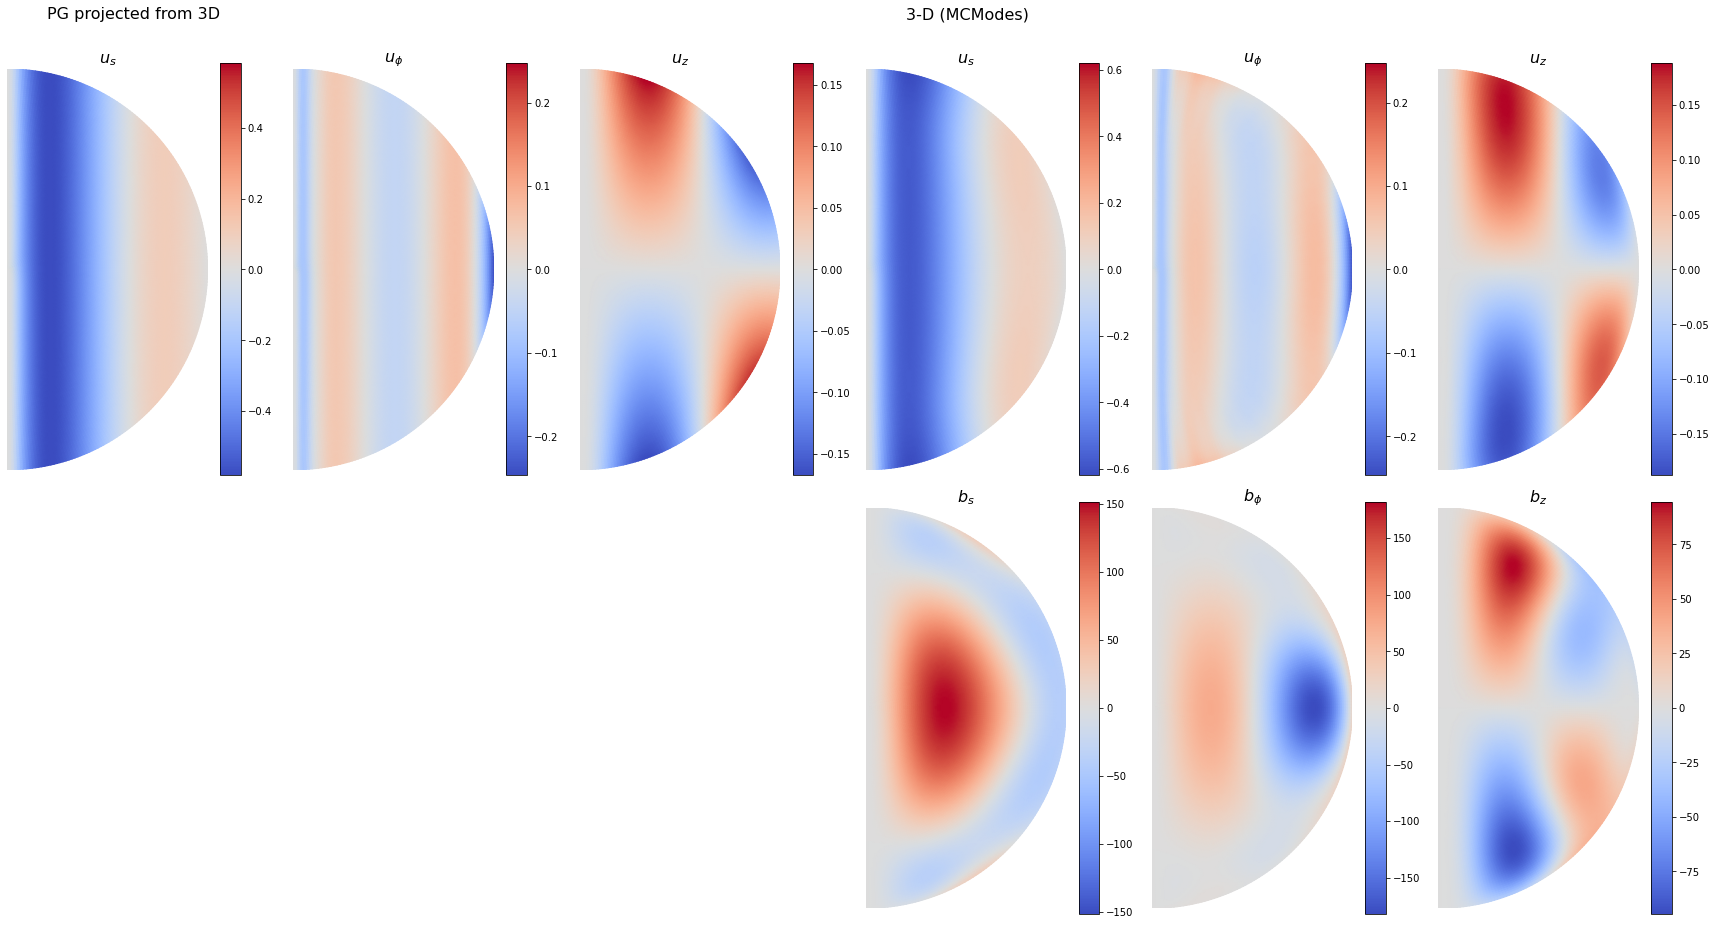

In [39]:
plot_fields = [
    ["U_s", "U_p", "U_z", ],
    ["B_s", "B_p", "B_z", ]
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
    [r"$b_s$", r"$b_\phi$", r"$b_z$", ]
]

save_name = None
override = False

force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(2*ncols*4, 2*nrows*3.2))
axes = np.atleast_2d(axes)

norm_pg = 1
norm_3d = 1

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        # PG plot
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eval_pg_f_3d._field_names) or (eval_pg_f_3d[fname] is None):
            ax.remove()
        else:
            f_eval = np.real(p_factor*eval_pg_f_3d[fname]/norm_pg)
            if np.abs(f_eval).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(f_eval))
                    # climit = 0.2
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, f_eval, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, 'PG projected from 3D', fontsize=16)
        
        ax = axes[i_r][ncols + i_c]
        if (fname is None) or (fname not in fields_3d) or (fields_3d[fname] is None):
            ax.remove()
        else:
            field_plot = np.real(p_factor*fields_3d[fname]/norm_3d)
            if np.abs(field_plot).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(field_plot))
                    # climit = 0.6
                    # if fname == 'U_p':
                    #     climit = np.max(np.abs(field_plot[S_mesh < 0.6]))
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, field_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, '3-D (MCModes)', fontsize=16)

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=300, bbox_inches="tight")

plt.show()

#### Validate equatorial slice

Calculate 3D-projected PG results on equatorial plane

In [31]:
x_grid = specfun.roots_chebyt(100)[0]
s_grid = np.sqrt((1 + x_grid)/2)

def calc_field_eqrad_PG(fname, field_f, evec_pg):
    N_trial = field_nrange[fname]
    S_tmp, N_tmp = np.meshgrid(s_grid, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_tmp, 0., 0., N_tmp, *[vec for vec in evec_pg])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_tmp[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    eval_rad = np.sum(eval_tmp, axis=-1)
    return eval_rad

eqrad_pg_f_3d = field_func.apply(lambda fname, x: calc_field_eqrad_PG(fname, x, evec_pg_f_3d), inplace=False, metadata=True)

Calculate 3D results on equatorial plane

In [38]:
fields_3d_eq = pg_3d.pg_phys_moments_lin_zint(mode_bg, bsp, s_grid, 65)
fields_3d_eq = pg_3d.pg_phys_b_equatorial(bsp, s_grid, out_field=fields_3d_eq)
fields_3d_eq = pg_3d.pg_phys_b_ul(bsp, s_grid, out_field=fields_3d_eq)

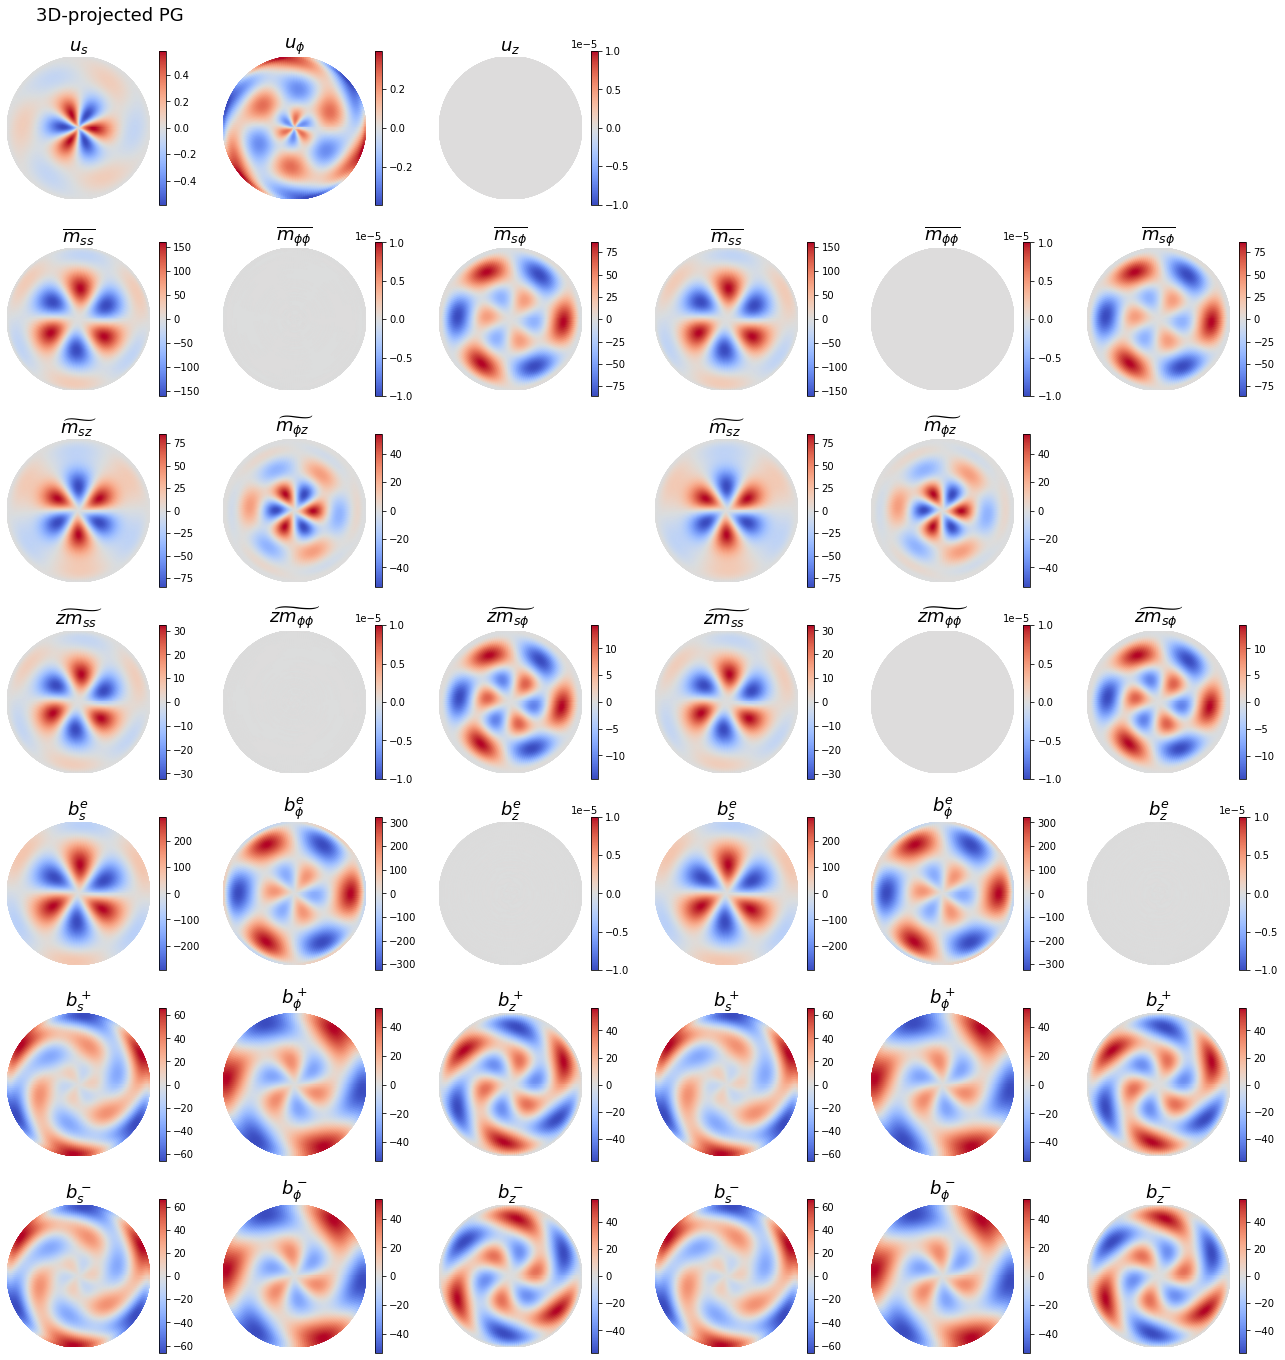

In [45]:
plot_fields = [
    ["U_s", "U_p", "U_z"],
    ["Mss", "Mpp", "Msp"], 
    ["Msz", "Mpz", None],
    ["zMss", "zMpp", "zMsp"],
    ["Bs_e", "Bp_e", "Bz_e"],
    ["Bs_p", "Bp_p", "Bz_p"],
    ["Bs_m", "Bp_m", "Bz_m"]
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
    [r'$\overline{m_{ss}}$', r'$\overline{m_{\phi\phi}}$', r'$\overline{m_{s\phi}}$'], 
    [r'$\widetilde{m_{sz}}$', r'$\widetilde{m_{\phi z}}$', None], 
    [r'$\widetilde{zm_{ss}}$', r'$\widetilde{zm_{\phi\phi}}$', r'$\widetilde{zm_{s\phi}}$'],
    [r'$b_s^e$', r'$b_\phi^e$', r'$b_z^e$'],
    [r'$b_s^+$', r'$b_\phi^+$', r'$b_z^+$'],
    [r'$b_s^-$', r'$b_\phi^-$', r'$b_z^-$']
]

norm_3d = 1
p_array = np.linspace(0, 2*np.pi, num=201)
anchor_phase_3d = 1/eqrad_pg_f_3d['Bp_e'].flatten()[np.argmax(np.abs(eqrad_pg_f_3d['Bp_e']))]
p_cst_3d = np.angle(anchor_phase_3d)/m_val
p_factor_3d = np.exp(1j*m_val*(p_array + p_cst_3d))

S_eq, P_eq = np.meshgrid(s_grid, p_array)
X_mesh, Y_mesh = S_eq*np.cos(P_eq), S_eq*np.sin(P_eq)

save_name = None
override = False

norm = 1

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=2*ncols, figsize=(2*ncols*3, nrows*2.7))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        ax = axes[i_r][i_c]
        if (fname is None) or (fname not in eqrad_pg_f_3d._field_names) or (eqrad_pg_f_3d[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_3d, eqrad_pg_f_3d[fname])/norm)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(-0.6, 1.5, '3D-projected PG', fontsize=18)
                
        ax = axes[i_r][ncols+i_c]
        if (fname is None) or (fname not in fields_3d_eq._field_names) or (fields_3d_eq[fname] is None):
            ax.remove()
        else:
            f_plot = np.real(np.outer(p_factor_3d, fields_3d_eq[fname])/norm)
            if np.abs(f_plot).max() > 1e-5:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(X_mesh, Y_mesh, f_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=18)
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
        if i_r == 0 and i_c == 0:
            ax.text(-0.6, 1.5, '3-D (MCModes)', fontsize=18)

# fig.suptitle('$\\omega_{{PG}}$={:.3e}, $\\omega_{{3D}}$={:.3e}'.format(eig_vals_pg[i_pg], eig_vals_3d[i_3d]), fontsize=18)
plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

#### Stream function reconstruction comparison

In [46]:
for comp in ['U_s', 'U_p', 'U_z']:
    rmsd_norm = np.linalg.norm((fields_3d[comp] - eval_pg_f_3d[comp]).flatten())/np.linalg.norm((fields_3d[comp]).flatten())
    norm_3d = np.linalg.norm(fields_3d[comp].flatten())
    print("Component {} | RMS L2-norm difference: {:4f} | Norm: {:4f}".format(comp, rmsd_norm, norm_3d))

Component U_s | RMS L2-norm difference: 0.033228 | Norm: 51.286928
Component U_p | RMS L2-norm difference: 0.055285 | Norm: 26.849864
Component U_z | RMS L2-norm difference: 0.350361 | Norm: 10.560274


Comparing results from different stream function estimation

In [47]:
from pg_utils import tools as pg_tools
psi_spectra = dict()
timer = pg_tools.ProcTimer(start=True)
Nz = 65
Ns = 121

psi_transform = base_f.JacobiPolar_2side(Ns, 1, np.abs(m_val - 1), 3/2, np.abs(m_val - 1), qmode='lowest', dealias=1.2)
x_grid_psi = psi_transform.grid
s_grid_psi = np.sqrt((1 + x_grid_psi)/2)
w_grid_psi = psi_transform.wt_quad
psi_spectra['LSQ bulk v'], RMS_res = pg_3d.pg_spec_psi_vbulk_lsq(usp, xpd_cfg.recipe, Nz, m_val, Ns, s_grid_psi, w_grid_psi, RMS_misfit=True)
timer.flag(loginfo=f"Complete: LSQ reconstruction using volumetric v, misfit: {RMS_res: .4f}", print_str=True)

psi_transform = base_f.JacobiPolar_2side(Ns, 3, m_val, 3/2, m_val, qmode='lowest', dealias=1.2)
x_grid_psi = psi_transform.grid
s_grid_psi = np.sqrt((1 + x_grid_psi)/2)
psi_est = pg_3d.pg_phys_psi_f_vs_mean(usp, s_grid_psi, Nz, m_val)
psi_spectra['z-averaged vs'] = psi_transform.transform_fwd(psi_est)
timer.flag(loginfo="Complete: z-averaged v_s", print_str=True)

psi_transform = base_f.JacobiPolar_2side(Ns, 0, np.abs(m_val - 1), 1/2, np.abs(m_val - 1), qmode='lowest', dealias=1.2)
x_grid_psi = psi_transform.grid
s_grid_psi = np.sqrt((1 + x_grid_psi)/2)
w_grid_psi = psi_transform.wt_quad
psi_spectra['LSQ z-ave v_e'], RMS_res = pg_3d.pg_spec_psi_vmean_lsq(usp, xpd_cfg.recipe, Nz, m_val, Ns, s_grid_psi, w_grid_psi, RMS_misfit=True)
timer.flag(loginfo=f"Complete: LSQ reconstruction using z-averaged v_e, misfit: {RMS_res: .4f}", print_str=True)

Elapse time (0) =    35.22 | Info: Complete: LSQ reconstruction using volumetric v, misfit:  0.0986
Elapse time (0) =    70.50 | Info: Complete: z-averaged v_s
Elapse time (0) =   107.12 | Info: Complete: LSQ reconstruction using z-averaged v_e, misfit:  0.0000


In [ ]:
np.linalg.norm(psi_spectra['z-averaged vs'] - psi_spectra['LSQ z-ave v_e'])/np.linalg.norm(psi_spectra['z-averaged vs'])

6.69275236501124e-07

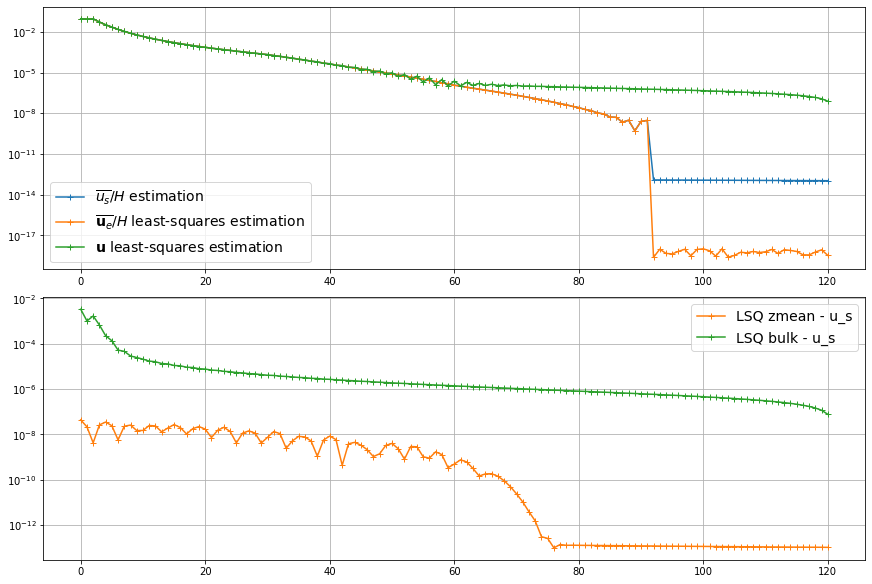

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), layout='constrained')

ax = axes[0]
ax.semilogy(np.abs(psi_spectra['z-averaged vs']), '+-', label=r'$\overline{u_s}/H$ estimation')
ax.semilogy(np.abs(psi_spectra['LSQ z-ave v_e']), '+-', label=r'$\overline{\mathbf{u}_e}/H$ least-squares estimation')
ax.semilogy(np.abs(psi_spectra['LSQ bulk v']), '+-', label=r'$\mathbf{u}$ least-squares estimation')
ax.grid(which='both')
ax.legend(fontsize=14)

ax = axes[1]
ax.semilogy(np.abs(psi_spectra['z-averaged vs'] - psi_spectra['LSQ z-ave v_e']), '+-', color='tab:orange', label=r'LSQ zmean - u_s')
ax.semilogy(np.abs(psi_spectra['z-averaged vs'] - psi_spectra['LSQ bulk v']), '+-', color='tab:green', label=r'LSQ bulk - u_s')
ax.grid(which='both')
ax.legend(fontsize=14)

plt.show()

In [51]:
from pg_utils.numerics import utils as nutils

Ntrunc = Ns

v_transform = base_f.JacobiPolar_2side(Ntrunc, 0, np.abs(np.abs(m_val) - 1), 1/2, np.abs(np.abs(m_val) - 1), qmode='lowest', dealias=1.2)
x_grid_v = v_transform.grid
s_grid_v = np.sqrt((1 + x_grid_v)/2)
w_quad_v = v_transform.wt_quad
z_grid_v, wt = specfun.roots_legendre(101)
H_grid_v = np.sqrt(1 - s_grid_v**2)
z_quad_v = np.outer(z_grid_v, H_grid_v)
s_quad_v = np.ones_like(z_quad_v)*s_grid_v

def calc_field_meridional_PG(fname, field_f, psi_spec):
    N_trial = field_nrange[fname]
    S_tmp, Z_tmp = np.stack([s_quad_v,]*N_trial, axis=-1), np.stack([z_quad_v,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(s_quad_v) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, 0., Z_tmp, N_tmp, psi_spec, *([vec for vec in evec_mode_pg][1:]))
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(s_quad_v[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

u_val_pg = {
    comp: [
        calc_field_meridional_PG('U_s', field_func.U_s, psi_spectra[comp]), 
        calc_field_meridional_PG('U_p', field_func.U_p, psi_spectra[comp]), 
        calc_field_meridional_PG('U_z', field_func.U_z, psi_spectra[comp]), 
    ]
    for comp in psi_spectra
}

In [52]:
r_pts, t_pts, p_pts = nutils.coord_cart2sph(s_quad_v.flatten(), np.array(0.), z_quad_v.flatten())

u_val = usp.evaluate(r_pts, t_pts, 0.)
u_val = nutils.vector_sph2cyl(u_val['r'], u_val['theta'], u_val['phi'], r_pts, t_pts, p_pts)[:3]
u_val = {
    's': u_val[0].reshape(z_quad_v.shape),
    'p': u_val[1].reshape(z_quad_v.shape),
    'z': u_val[2].reshape(z_quad_v.shape),
}

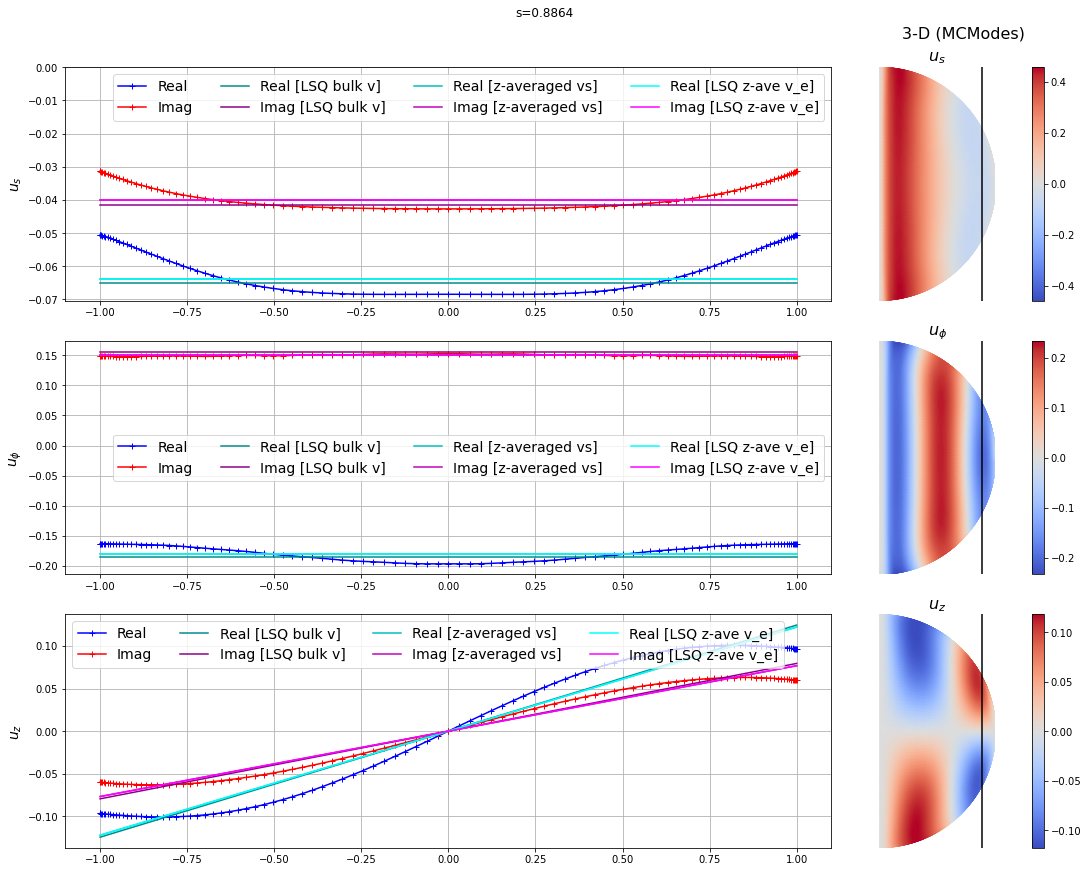

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12), width_ratios=[5, 1], layout='constrained')

# markers = ['x-', '^-', 'v-']
markers_real = [
    {'color': 'darkcyan'},
    {'color': 'c'},
    {'color': 'cyan'},
]

markers_imag = [
    {'color': 'darkmagenta'},
    {'color': 'm'},
    {'color': 'magenta'},
]

i_s = 100

ax = axes[0, 0]
ax.plot(z_grid_v, np.real(u_val['s'][:, i_s]), 'b+-', label='Real')
ax.plot(z_grid_v, np.imag(u_val['s'][:, i_s]), 'r+-', label='Imag')
for i_k, key in enumerate(u_val_pg):
    ax.plot(z_grid_v, np.real(u_val_pg[key][0][:, i_s]), **markers_real[i_k], label=f'Real [{key}]')
    ax.plot(z_grid_v, np.imag(u_val_pg[key][0][:, i_s]), **markers_imag[i_k], label=f'Imag [{key}]')
ax.grid(which='both')
ax.set_ylabel(r'$u_s$', fontsize=14)
ylim = ax.get_ylim()
ax.set_ylim([min([ylim[0], 0]), max([ylim[1], 0])])
ax.legend(fontsize=14, ncols=4)

ax = axes[1, 0]
ax.plot(z_grid_v, np.real(u_val['p'][:, i_s]), 'b+-', label='Real')
ax.plot(z_grid_v, np.imag(u_val['p'][:, i_s]), 'r+-', label='Imag')
for i_k, key in enumerate(u_val_pg):
    ax.plot(z_grid_v, np.real(u_val_pg[key][1][:, i_s]), **markers_real[i_k], label=f'Real [{key}]')
    ax.plot(z_grid_v, np.imag(u_val_pg[key][1][:, i_s]), **markers_imag[i_k], label=f'Imag [{key}]')
ax.grid(which='both')
ax.set_ylabel(r'$u_\phi$', fontsize=14)
ylim = ax.get_ylim()
ax.set_ylim([min([ylim[0], 0]), max([ylim[1], 0])])
ax.legend(fontsize=14, ncols=4)

ax = axes[2, 0]
ax.plot(z_grid_v, np.real(u_val['z'][:, i_s]), 'b+-', label='Real')
ax.plot(z_grid_v, np.imag(u_val['z'][:, i_s]), 'r+-', label='Imag')
for i_k, key in enumerate(u_val_pg):
    ax.plot(z_grid_v, np.real(u_val_pg[key][2][:, i_s]), **markers_real[i_k], label=f'Real [{key}]')
    ax.plot(z_grid_v, np.imag(u_val_pg[key][2][:, i_s]), **markers_imag[i_k], label=f'Imag [{key}]')
ax.grid(which='both')
ax.set_ylabel(r'$u_z$', fontsize=14)
ylim = ax.get_ylim()
ax.set_ylim([min([ylim[0], 0]), max([ylim[1], 0])])
ax.legend(fontsize=14, ncols=4)

fig.suptitle(f's={s_grid_v[i_s]:.4f}')

#========================= Meridional plot ================================================

plot_fields = [
    ["s", "p", "z", ],
]
plot_fnames = [
    [r"$u_s$", r"$u_\phi$", r"$u_z$"],
]
force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*6.4))
# axes = np.atleast_2d(axes)
norm_3d = 1

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        
        ax = axes[i_c][1]
        if (fname is None) or (fname not in u_val) or (u_val[fname] is None):
            ax.remove()
        else:
            # field_plot = np.real(p_factor*fields_3d[fname]/norm_3d)
            field_plot = np.real(u_val[fname]/norm_3d)
            if np.abs(field_plot).max() > 1e-5:
                if force_symmetric_cmap:
                    climit = np.max(np.abs(field_plot))
                    cm = ax.pcolormesh(s_quad_v, z_quad_v, field_plot, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                    ax.vlines([s_grid_v[i_s],], -1, 1, color='k')
                    plt.colorbar(cm, ax=ax)
                else:
                    cm = ax.pcolormesh(s_quad_v, z_quad_v, field_plot, shading="gouraud", cmap="coolwarm")
                    plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(s_quad_v, z_quad_v, field_plot, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
                plt.colorbar(cm, ax=ax)
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
            ax.set_xlim([0, 1])
            ax.set_ylim([-1, 1])
            ax.set_aspect('equal', 'box')
            ax.axis("off")
            if i_r == 0 and i_c == 0:
                ax.text(0.2, 1.25, '3-D (MCModes)', fontsize=16)

plt.show()